<a href="https://colab.research.google.com/github/kirangang/ML_Projects/blob/main/Netflix_Movies_and_TV_Shows_Clustering_Notebook_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies and TV Shows Clustering

**Project Type** - Unsupervised

**Contribution** - Individual

# **Project Summary -**

The objective of this project is to analyze and create clusters related to Netflix. The dataset contains information on approximately 7,787 entries, encompassing 12 various attributes associated with Netflix TV shows and movies, including title, genre, release year, duration, rating, date added, and others.The aim is to explore patterns and similarities among the content available on the platform and group them into meaningful clusters, which can assist companies in enhancing user engagement and satisfaction, ultimately leading to increased retention and company revenue.

The first phase of the project involved data wrangling. I converted data types of columns like date_added to datetime type and extracted year and month from it to two new columns month_added and year_added. Additionally, I found out that the duration unit of movies is in minutes and seasons for TV Shows.

During the Exploratory Data Analysis (EDA), I analyzed various aspects of the dataset to gain insights. This included examining proportions of Movies and TV Shows, Content added over the years, Top Countries with the highest number of TV Shows and Movies, Top Ratings for Movies/Shows, top Genres, directors, actors, and Movies/TV Shows by months of the year.

Next, I conducted hypothesis testing to validate my findings from EDA. Specifically, I used one-sample t-test to test if the duration of kids' movies is less than 2 hours. Additionally, I employed one-sample z-test for proportion to assess if the proportion of movies with a rating of 'TV-MA' (mature audience only) has increased in the last decade. The results of these tests confirmed my findings from EDA.

Furthermore, I handled missing values in the director, cast, and country columns. This involved preprocessing of textual data, including steps such as Expanding Contractions, Lowercasing, Removing punctuations, non-ASCII characters, Stopwords, URLs, white spaces, Lemmatization, and Tokenization.

After preprocessing the data, I applied TF-IDF vectorization to convert text data into numerical data. Subsequently, Truncated SVD was utilized to reduce the dimensionality of the data, with the optimal number of components determined as 3000.

Algorithms used in this process include clustering techniques such as k-means and hierarchical clustering. These algorithms assist Netflix in grouping movies and TV shows with similar features into distinct groups, each representing a unique category.

The ultimate goal of this clustering is to enhance the user experience on Netflix by providing personalized content recommendations to users using cosine similarity score. By employing this approach, Netflix can suggest titles to users that are more likely to match their interests, thereby increasing the likelihood of users staying engaged with the platform.

# **GitHub Link -**

https://github.com/kirangang/ML_Projects

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, we are required to do </b>
1. Exploratory Data Analysis

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries and modules

# libraries that are used for analysis and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px


# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# libraries used to process textual data
import string
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# libraries used to implement clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

# libraries that are used to construct a recommendation system
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from collections import Counter

# Library of warnings would assist in ignoring warnings issued
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Dataset Loading

In [ ]:
# Connecting the google colab notebook with the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the dataset to be analysed
data = pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [ ]:
# Shows first 5 rows
data.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [ ]:
# Shows last 5 rows
data.tail()

show_id     type                                    title     director  \
7782   s7783    Movie                                     Zozo  Josef Fares   
7783   s7784    Movie                                   Zubaan  Mozez Singh   
7784   s7785    Movie                        Zulu Man in Japan          NaN   
7785   s7786  TV Show                    Zumbo's Just Desserts          NaN   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     Sam Dunn   

                                                   cast  \
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                            Nasty C   
7785                         Adriano Zumbo, Rachel Khoo   
7786                                                NaN   

                                                country          date_added  \
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating  duration  \
7782          2005  TV-MA    99 min   
7783          2015  TV-14   111 min   
7784          2019  TV-MA    44 min   
7785          2019  TV-PG  1 Season   
7786          2019  TV-MA    90 min   

                                              listed_in  \
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
data.shape

(7787, 12)

### Dataset Information

In [ ]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(data[data.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

<Axes: >

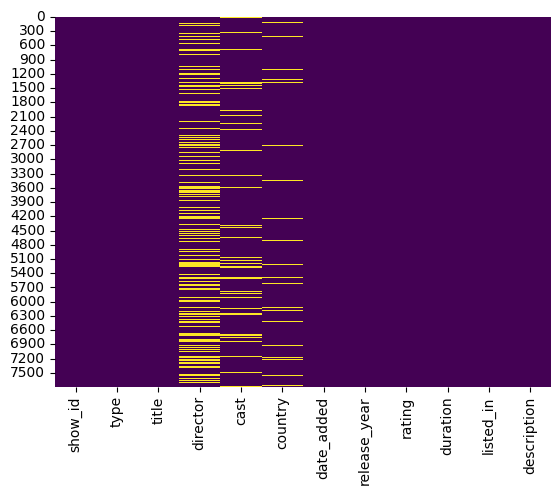

In [ ]:
# Visualizing the missing values
sns.heatmap(data.isnull(), cmap='viridis', cbar=False)

### What did you know about your dataset?

* The above dataset is about Netflix Movies and TV Shows Clustering, where our task is to examine the dataset, build the clustering methods and content based recommendation system.
* The dataset has 7787 rows and 12 columns.
* There are no duplicate rows present in the dataset.
* There are some null values present in the columns director, cast, country, date_added and rating.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Describe numerical variables
data.describe()

release_year
count   7787.000000
mean    2013.932580
std        8.757395
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000

In [ ]:
# Describe categorical variables
data.describe(include=['object','category'])

show_id   type title                director                cast  \
count     7787   7787  7787                    5398                7069   
unique    7787      2  7787                    4049                6831   
top         s1  Movie    3%  Raúl Campos, Jan Suter  David Attenborough   
freq         1   5377     1                      18                  18   

              country       date_added rating  duration      listed_in  \
count            7280             7777   7780      7787           7787   
unique            681             1565     14       216            492   
top     United States  January 1, 2020  TV-MA  1 Season  Documentaries   
freq             2555              118   2863      1608            334   

                                              description  
count                                                7787  
unique                                               7769  
top     Multiple women report their husbands as missin...  
freq                                                    3

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
data.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

### Variables Description

**1. show_id :** Unique ID for every Movie / TV Show

**2. type :** Identifier - A Movie or TV Show

**3. title :** Title of the Movie / TV Show

**4. director :** Director of the Movie / Show

**5. cast :** Actors involved in the Movie / Show

**6. country :** Country where the Movie / Show was produced

**7. date_added :** Date it was added on Netflix

**8. release_year :** Actual release year of the Movie / Show

**9. rating :** TV Rating of the Movie / Show

**10. duration :** Total duration in minutes or number of seasons

**11. listed_in :** Genre

**12. description:** The Summary description

## 3. ***Data Wrangling***

In [ ]:
# Creating a copy of our dataset
df = data.copy()

In [ ]:
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

## Changing data type of date_added column from string to datetime format

In [ ]:
# Strip leading and trailing spaces from the 'date_added' column
df['date_added'] = df['date_added'].str.strip()

In [ ]:
# Typecasting 'date_added' from string to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
# Adding new attributes month and year of date added
df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year

### Filtering Movies and TV shows data

In [ ]:
# Filter data for movies
df_movies = df[df['type'] == 'Movie'].copy()

In [ ]:
# Filter data for TV shows
df_tv_shows = df[df['type'] == 'TV Show'].copy()

In [ ]:
# Remove min from duration column to make it integer
df_movies.duration = df_movies.duration.str.replace(' min','').astype(int)
df_movies.head()

show_id   type  title           director  \
1      s2  Movie   7:19  Jorge Michel Grau   
2      s3  Movie  23:59       Gilbert Chan   
3      s4  Movie      9        Shane Acker   
4      s5  Movie     21     Robert Luketic   
6      s7  Movie    122    Yasir Al Yasiri   

                                                cast        country  \
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   
6  Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...          Egypt   

  date_added  release_year rating  duration  \
1 2016-12-23          2016  TV-MA        93   
2 2018-12-20          2011      R        78   
3 2017-11-16          2009  PG-13        80   
4 2020-01-01          2008  PG-13       123   
6 2020-06-01          2019  TV-MA        95   

                                           listed_in  \
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   
6                Horror Movies, International Movies   

                                         description  month_added  year_added  
1  After a devastating earthquake hits Mexico Cit...         12.0      2016.0  
2  When an army recruit is found dead, his fellow...         12.0      2018.0  
3  In a postapocalyptic world, rag-doll robots hi...         11.0      2017.0  
4  A brilliant group of students become card-coun...          1.0      2020.0  
6  After an awful accident, a couple admitted to ...          6.0      2020.0

In [ ]:
# Adding season column instead of duration in Tv shows
df_tv_shows.rename(columns={'duration':'seasons'}, inplace=True)
df_tv_shows.replace({'seasons':{'1 Season':'1 Seasons'}}, inplace=True)
df_tv_shows.seasons = df_tv_shows.seasons.str.replace(' Seasons','').astype(int)
df_tv_shows.head()

show_id     type   title              director  \
0       s1  TV Show      3%                   NaN   
5       s6  TV Show      46           Serdar Akar   
11     s12  TV Show    1983                   NaN   
12     s13  TV Show    1994  Diego Enrique Osorno   
16     s17  TV Show  Feb-09                   NaN   

                                                 cast                country  \
0   João Miguel, Bianca Comparato, Michel Gomes, R...                 Brazil   
5   Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...                 Turkey   
11  Robert Więckiewicz, Maciej Musiał, Michalina O...  Poland, United States   
12                                                NaN                 Mexico   
16  Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...                    NaN   

   date_added  release_year rating  seasons  \
0  2020-08-14          2020  TV-MA        4   
5  2017-07-01          2016  TV-MA        1   
11 2018-11-30          2018  TV-MA        1   
12 2019-05-17          2019  TV-MA        1   
16 2019-03-20          2018  TV-14        1   

                                            listed_in  \
0   International TV Shows, TV Dramas, TV Sci-Fi &...   
5     International TV Shows, TV Dramas, TV Mysteries   
11  Crime TV Shows, International TV Shows, TV Dramas   
12  Crime TV Shows, Docuseries, International TV S...   
16                  International TV Shows, TV Dramas   

                                          description  month_added  year_added  
0   In a future where the elite inhabit an island ...          8.0      2020.0  
5   A genetics professor experiments with a treatm...          7.0      2017.0  
11  In this dark alt-history thriller, a naïve law...         11.0      2018.0  
12  Archival video and new interviews examine Mexi...          5.0      2019.0  
16  As a psychology professor faces Alzheimer's, h...          3.0      2019.0

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### Chart - 1

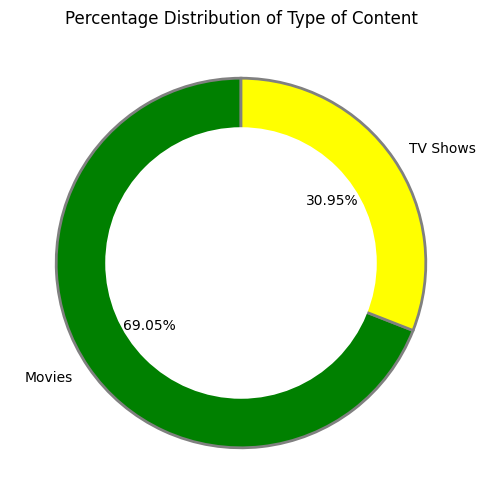

In [ ]:
# Chart - 1 visualization code

plt.figure(figsize=(10, 6))
my_colors = ['green', 'yellow']
labels = ['Movies', 'TV Shows']

# Set title with black font color
plt.title('Percentage Distribution of Type of Content', color='black')

# Plot pie chart with black font color for percentage labels
plt.pie(df['type'].value_counts(), labels=labels, autopct='%1.2f%%', startangle=90, colors=my_colors, wedgeprops={'edgecolor': 'gray', 'linewidth': 2.0}, textprops={'color': 'black'})

# Draw a white circle at the center to create the hole
centre_circle = plt.Circle((0, 0), 0.73, color='white', fc='white', linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()


##### 1. Why did you pick the specific chart?

 I pick the pie chart because it is effective in visualizing the distribution of categorical data. In this case, the chart is used to represent the types of content watched on Netflix, which are categorized as "TV Show" and "Movie."

##### 2. What is/are the insight(s) found from the chart?

Movies constitute the majority, accounting for 69.05% of the content watched on Netflix, while TV Shows make up a smaller percentage of 30.95%.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it will help gain insights to create a positive business impact.

### Chart - 2

In [ ]:
# Chart - 2 visualization code

import plotly.graph_objects as go

content_1 = df_tv_shows["year_added"].value_counts().sort_index()
content_2 = df_movies["year_added"].value_counts().sort_index()

fig = go.Figure()

fig.add_trace(go.Scatter(x=content_1.index, y=content_1.values, name="TV Shows", marker_color='#ffd700', line=dict(width=4)))
fig.add_trace(go.Scatter(x=content_2.index, y=content_2.values, name="Movies", marker_color='#008000', line=dict(width=4)))

fig.update_layout(title="Type of content added over the years", title_x=0.5, legend=dict(x=0.8, y=1.1, orientation="h"))

fig.show()


##### 1. Why did you pick the specific chart?

The line chart is well-suited for illustrating the trend and distribution of data over a continuous axis, (in this case, years). It facilitates easy comparison between the two categories (TV shows and Movies) and visually represents how their counts fluctuate over time.

##### 2. What is/are the insight(s) found from the chart?

The trend depicted in the visualization suggests that between 2008 and 2022, there was a relatively low number of TV shows and movies added to Netflix. However, starting from 2016, there was a slight uptick in content additions. Notably, in 2019, there was a significant peak in the number of movies added, while TV shows followed a similar trend, albeit with a less pronounced increase compared to movies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained suggest a positive trajectory for Netflix, with the demand for both movies and TV shows on the platform showing rapid growth over the years. This presents Netflix with an opportunity to expand its library with high-quality content, thereby further enhancing user satisfaction and engagement.

### Chart - 3

In [ ]:
# Chart - 3 visualization code

import calendar

# Count the occurrences of each month
month_counts = df['month_added'].value_counts().reset_index()

# Rename the columns
month_counts.columns = ['month', 'count']

# Sort the DataFrame by month index
month_counts = month_counts.sort_values(by='month')

# Convert month index to month names
month_counts['month'] = month_counts['month'].astype(int)
month_counts['month'] = month_counts['month'].apply(lambda x: calendar.month_name[x])

# Create a bar chart
fig = px.bar(month_counts, x="month", y="count", text="count", color='count',
             color_continuous_scale='cividis')

# Update layout
fig.update_layout(
    title='Month-wise Addition of Content on Netflix',
    xaxis_title='Month',
    yaxis_title='Count',
    width=1000,
    height=500,
    showlegend=False,
    title_x=0.5,
)

# Show the plot
fig.show()


### Chart - 4

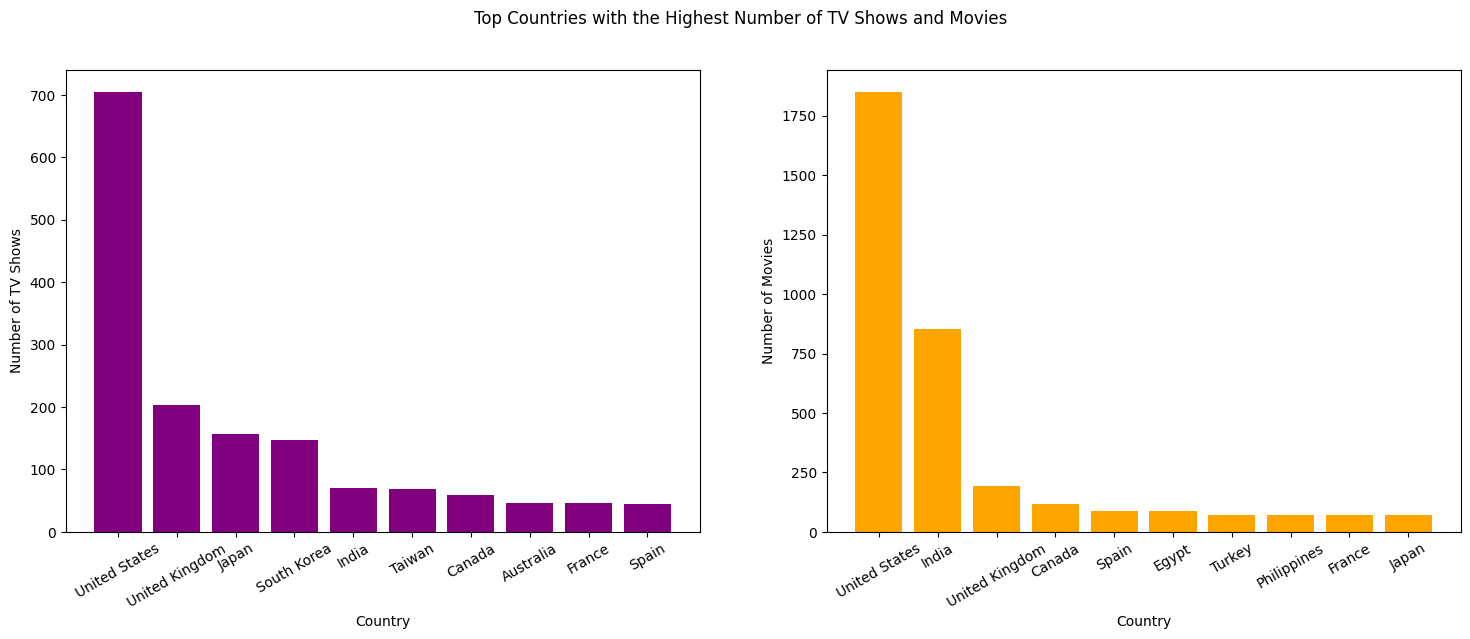

In [ ]:
# Chart - 4 visualization code

# Group the data by country and type, and count the number of entries in each group
d = df.groupby(['country', 'type']).size().reset_index(name='count')

# Getting shows of both types
d_tv = d[d['type'] == 'TV Show']
d_movies = d[d['type'] == 'Movie']

# Sort the result by count and get the top 10 countries
df_top_tv = d_tv.sort_values('count', ascending=False).head(10)
df_top_movies = d_movies.sort_values('count', ascending=False).head(10)

# Create a bar chart of the top countries with the highest number of TV Shows and Movies
plt.figure(figsize=(18,6))

# Plotting TV Shows
plt.subplot(1,2,1)
plt.bar(df_top_tv['country'], df_top_tv['count'], color='purple')
plt.ylabel('Number of TV Shows')
plt.xlabel('Country')
plt.xticks(rotation=30)

# Plotting Movies
plt.subplot(1,2,2)
plt.bar(df_top_movies['country'], df_top_movies['count'], color='orange')
plt.ylabel('Number of Movies')
plt.xlabel('Country')
plt.xticks(rotation=30)

plt.suptitle('Top Countries with the Highest Number of TV Shows and Movies')
plt.show()


### Chart - 5

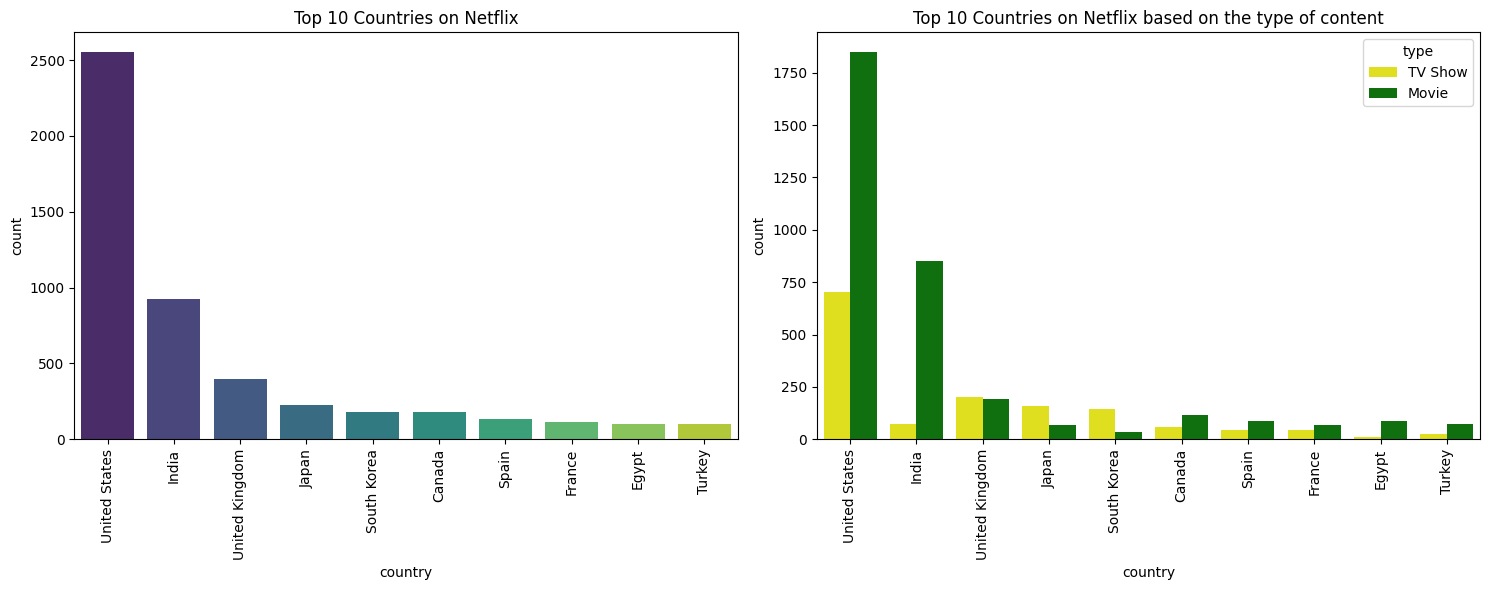

In [ ]:
# Chart - 5 visualization code

# Define a color palette dictionary
color_palette = {'Movie': 'green', 'TV Show': 'yellow'}

# Set up the figure and axes for subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for the first subplot - Top 10 Countries on Netflix
sns.countplot(
    x="country",                                      # x-axis variable (countries)
    data=df,                                          # Original DataFrame without filtering
    order=df['country'].value_counts().index[:10],    # Order the countries by count, showing only the top 10
    palette='viridis',                                # Using a color palette
    ax=axes[0]                                        # Specify the first subplot axes
)

# Rotate x-axis labels for better readability
axes[0].tick_params(axis='x', rotation=90)

axes[0].set_title('Top 10 Countries on Netflix')

# Plot for the second subplot - Top 10 Countries on Netflix based on the type of content
sns.countplot(
    x="country",                                      # x-axis variable (countries)
    data=df,                                          # Original DataFrame without filtering
    hue='type',                                       # Categorical variable to differentiate by color (type)
    order=df['country'].value_counts().index[:10],    # Order the countries by count, showing only the top 10
    palette=color_palette,                            # Assigning specific colors based on the type
    ax=axes[1]                                        # Specify the second subplot axes
)

# Rotate x-axis labels for better readability
axes[1].tick_params(axis='x', rotation=90)

axes[1].set_title('Top 10 Countries on Netflix based on the type of content')

# Adjust layout to prevent overlap of labels
plt.tight_layout()

# Display the plot
plt.show()


### Chart - 6

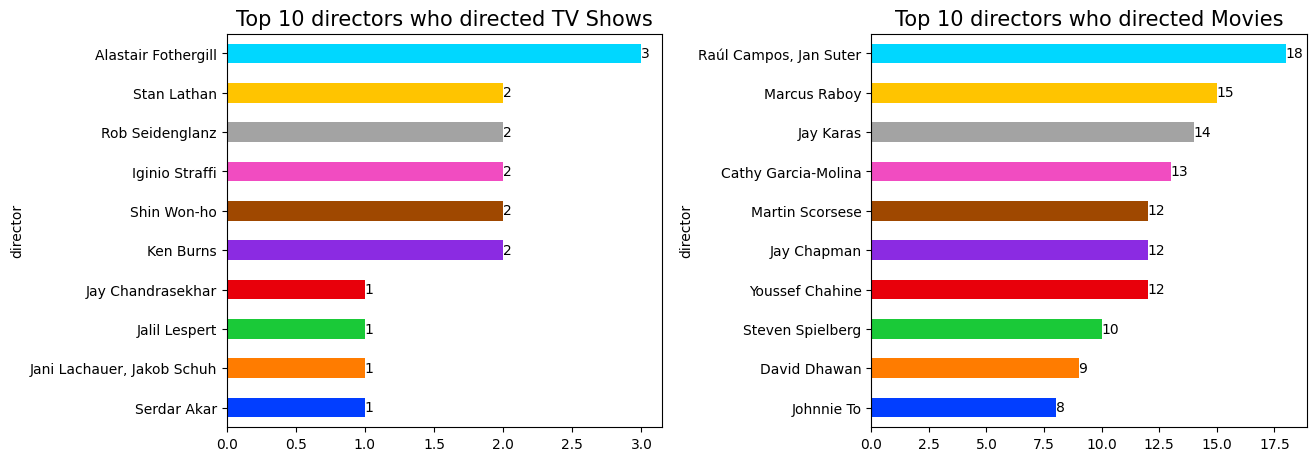

In [ ]:
# Chart - 6 visualization code

# Create subplots with specified figure size
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plot top 10 directors for TV shows with different colors and count on top
tv_shows_directors = df_tv_shows['director'].value_counts().head(10).sort_values(ascending=True)
colors = sns.color_palette('bright', n_colors=len(tv_shows_directors))
tv_shows = tv_shows_directors.plot(kind='barh', ax=ax[0], color=colors)
tv_shows.set_title('Top 10 directors who directed TV Shows', size=15)
for index, value in enumerate(tv_shows_directors.values):
    tv_shows.text(value, index, str(value), ha='left', va='center')

# Plot top 10 directors for movies with different colors and count on top
movies_directors = df_movies['director'].value_counts().head(10).sort_values(ascending=True)
colors = sns.color_palette('bright', n_colors=len(movies_directors))
movies = movies_directors.plot(kind='barh', ax=ax[1], color=colors)
movies.set_title('Top 10 directors who directed Movies', size=15)
for index, value in enumerate(movies_directors.values):
    movies.text(value, index, str(value), ha='left', va='center')

plt.tight_layout(pad=1.2, rect=[0, 0, 0.95, 0.95])
plt.show()


### Chart - 7

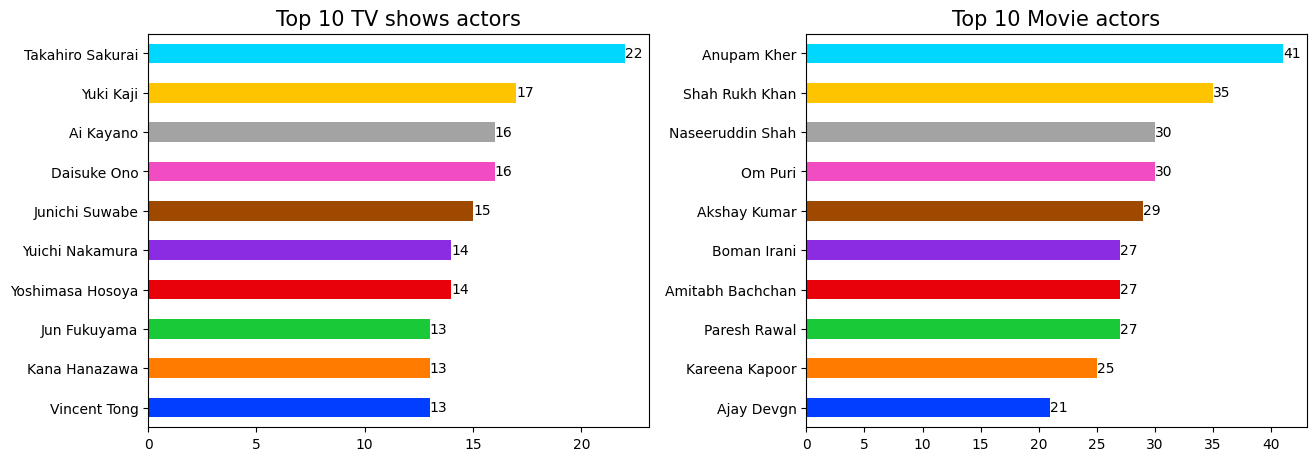

In [ ]:
# Chart - 7 visualization code

# Create subplots with specified figure size
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plot top 10 TV show actors with different colors and count on top
top_TVshows_actor = df_tv_shows['cast'].str.split(', ', expand=True).stack()
top_TVshows_actor_counts = top_TVshows_actor.value_counts().head(10).sort_values(ascending=True)  # Modified
colors = sns.color_palette('bright', n_colors=len(top_TVshows_actor_counts))
a = top_TVshows_actor_counts.plot(kind='barh', ax=ax[0], color=colors)
a.set_title('Top 10 TV shows actors', size=15)
for index, (value, count) in enumerate(top_TVshows_actor_counts.items()):
    a.text(count, index, str(count), ha='left', va='center')

# Plot top 10 movie actors with different colors and count on top
top_movie_actor = df_movies['cast'].str.split(', ', expand=True).stack()
top_movie_actor_counts = top_movie_actor.value_counts().head(10).sort_values(ascending=True)  # Modified
colors = sns.color_palette('bright', n_colors=len(top_movie_actor_counts))
b = top_movie_actor_counts.plot(kind='barh', ax=ax[1], color=colors)
b.set_title('Top 10 Movie actors', size=15)
for index, (value, count) in enumerate(top_movie_actor_counts.items()):
    b.text(count, index, str(count), ha='left', va='center')

plt.tight_layout(pad=1.2, rect=[0, 0, 0.95, 0.95])
plt.show()


### Chart - 8

In [ ]:
# Chart - 8 visualization code

top_10_Genre = df['listed_in'].value_counts().head(10)

fig = px.pie(top_10_Genre, values=top_10_Genre.values, names=top_10_Genre.index)

custom_colors = ['#4c78a8', '#72b7b2', '#ff7f0e', '#2ca02c', '#d62728']
fig.update_traces(hovertemplate=None, textposition='outside', textinfo='percent+label', rotation=0,
                   marker=dict(colors=custom_colors))

fig.update_layout(height=600, width=900, title='Top 10 genres on Netflix',
                   margin=dict(t=100, b=30, l=0, r=0),
                   showlegend=False,
                   plot_bgcolor='#fafafa',
                   paper_bgcolor='#fafafa',
                   title_font=dict(size=22, color='#3A3B3C', family="Lato, sans-serif"),
                   font=dict(size=12, color='#000000'),
                   hoverlabel=dict(bgcolor="#444", font_size=13, font_family="Lato, sans-serif"))

fig.show()



### Chart - 9

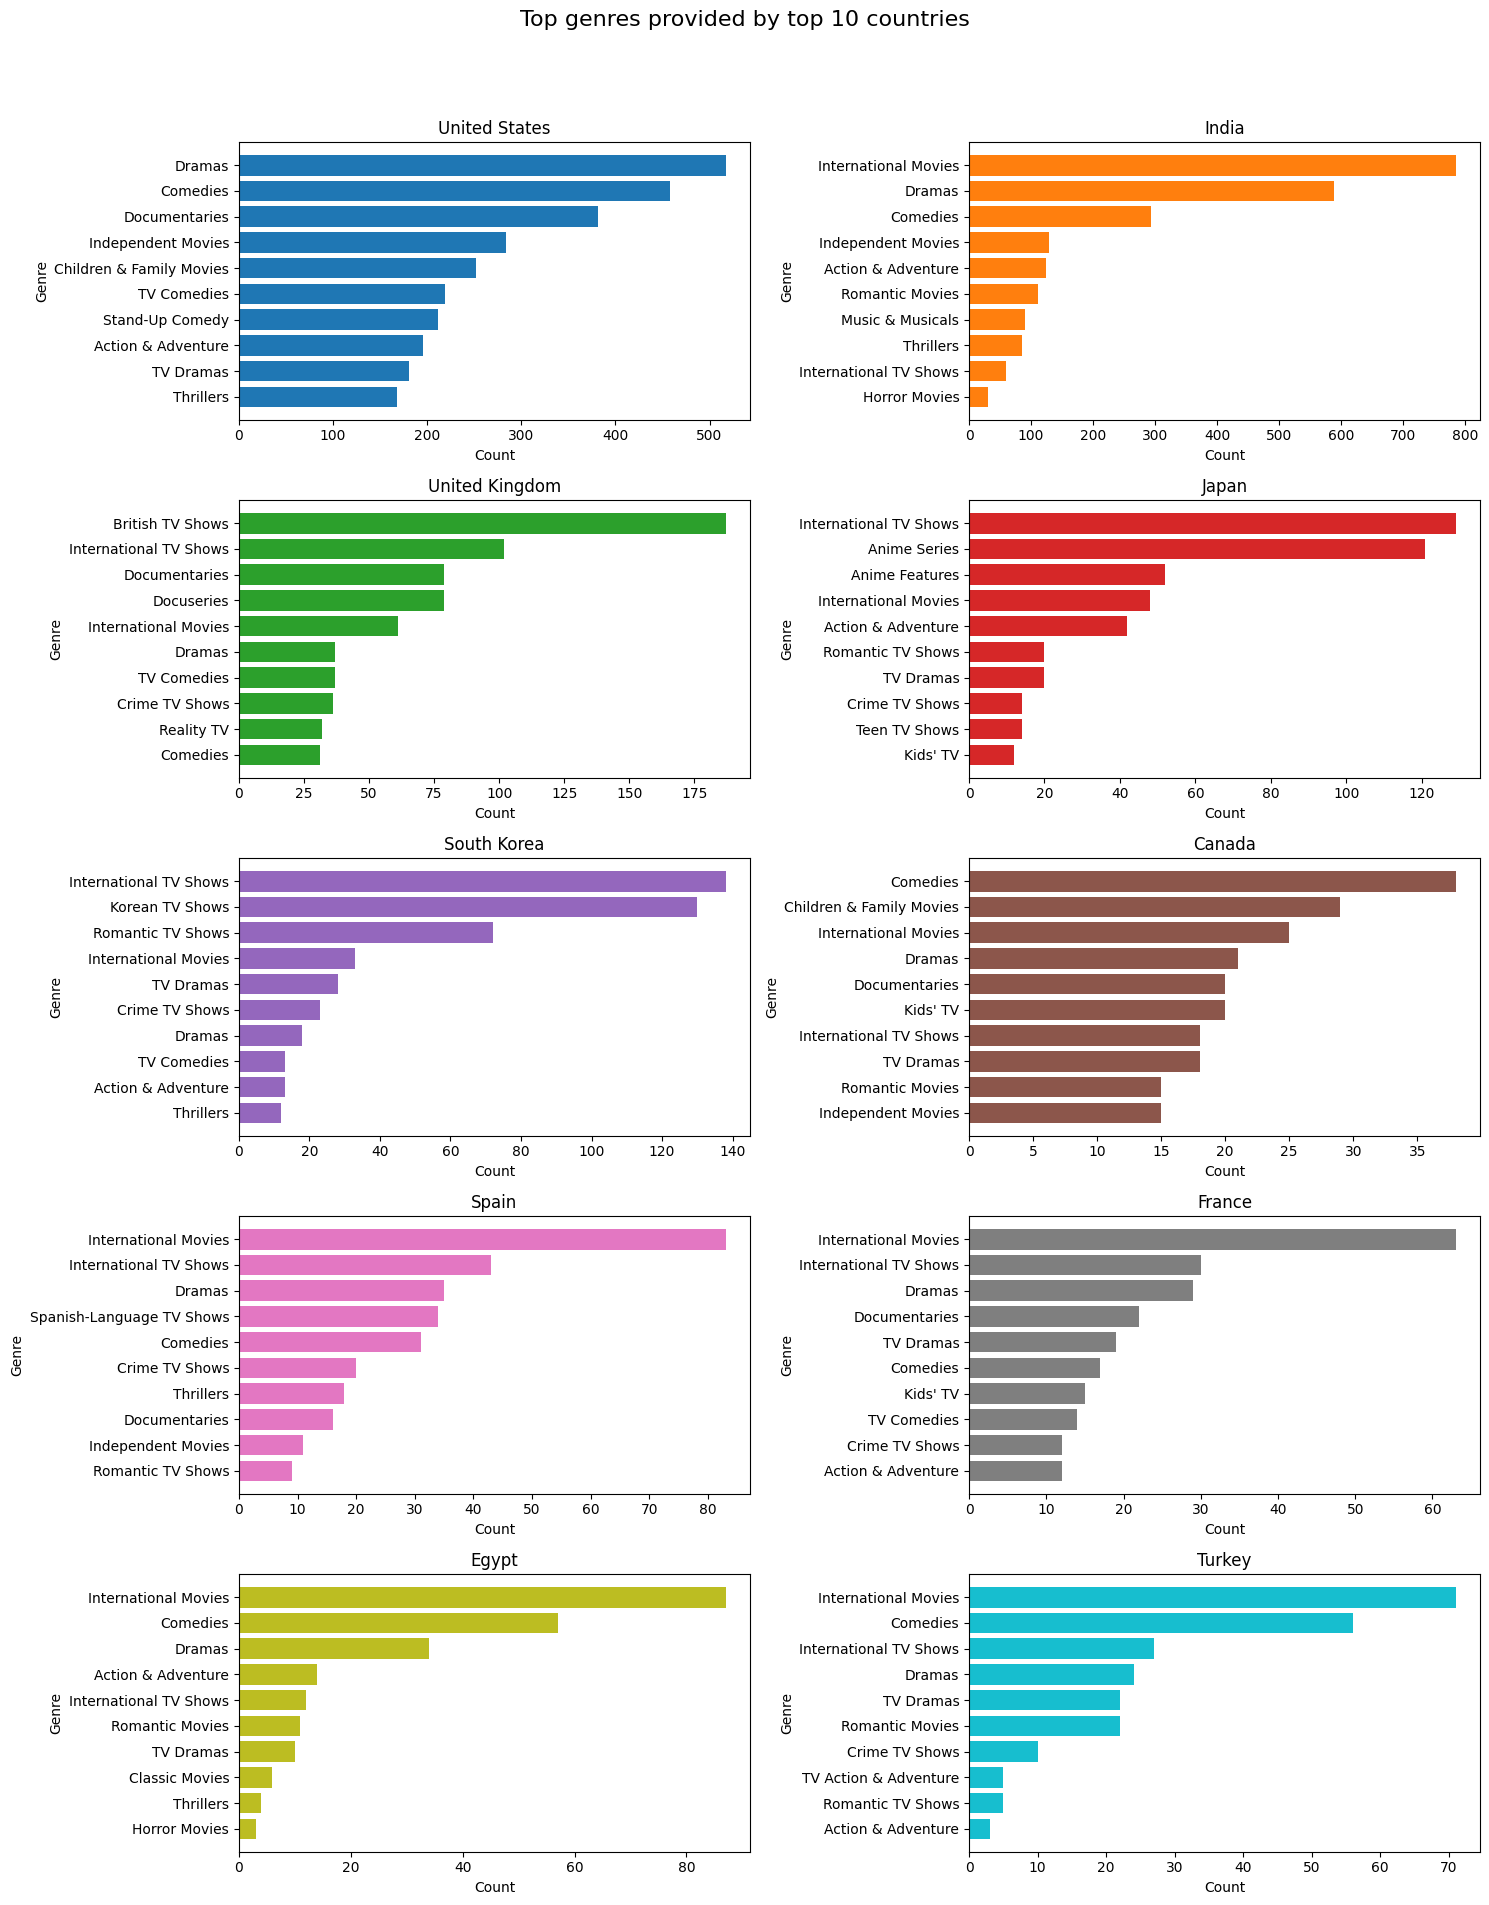

In [ ]:
# Chart - 9 visualization code

# Filter out rows where country is NaN
df_filtered = df[df['country'].notna()]

# Function to extract top genres and their counts for a specific country
def top_genre_by_country(df, country):
    # Filter data for the specified country
    country_df = df[df['country'] == country]
    # Count the occurrences of each genre and get the top 10
    genre_counter = Counter(", ".join(country_df['listed_in']).split(", ")).most_common(10)
    # Reverse the order to have the most watched genre first
    genre = [val[0] for val in genre_counter][::-1]
    count = [val[1] for val in genre_counter][::-1]
    return genre, count

# Find top 10 countries based on frequency (including 'Unknown')
top_countries = df_filtered['country'].value_counts().head(10).index.tolist()

# Define colors for each country
colors = plt.cm.tab10(np.linspace(0, 1, len(top_countries)))

# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
fig.suptitle('Top genres provided by top 10 countries', fontsize=16)

# Flatten the axes for easier iteration
axs = axs.flatten()

# Plot each country's top genres
for i, country in enumerate(top_countries):
    genre, count = top_genre_by_country(df_filtered, country)
    ax = axs[i]
    ax.barh(genre, count, color=colors[i])
    ax.set_title(country)
    ax.set_xlabel('Count')
    ax.set_ylabel('Genre')

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Chart - 10

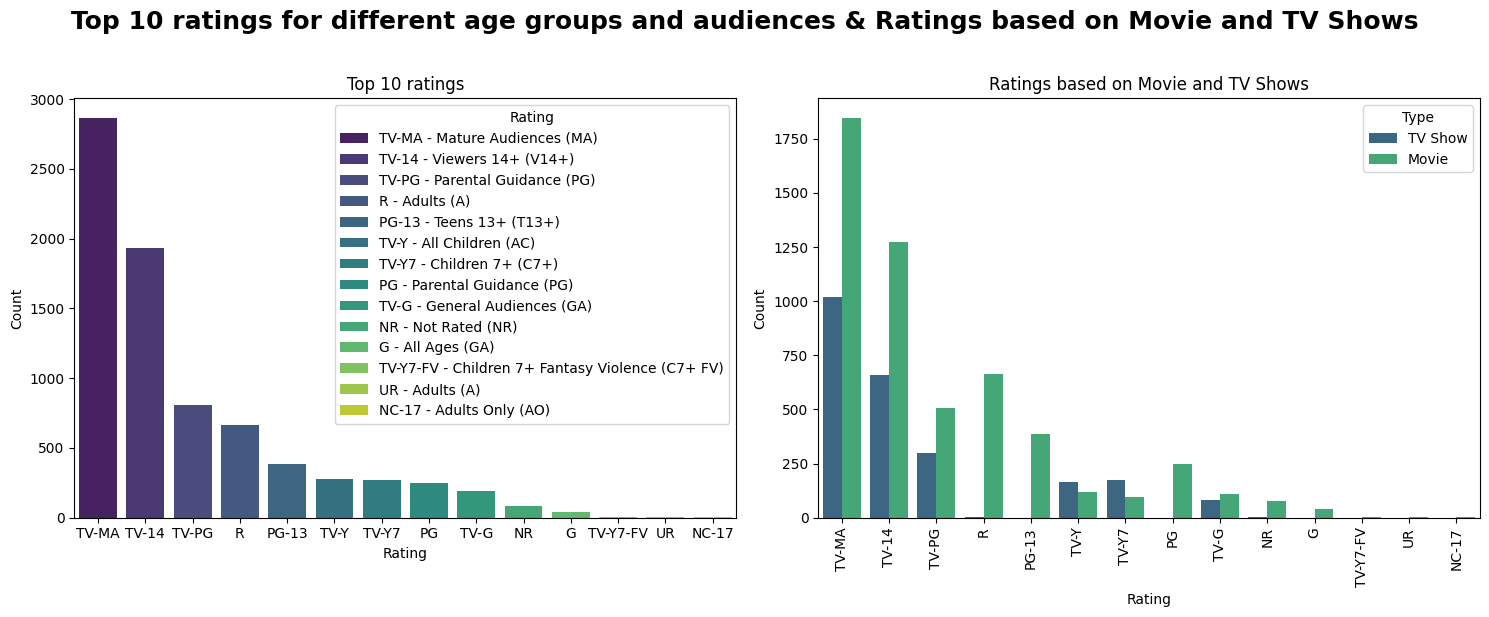

In [ ]:
# Chart - 10 visualization code

# Order of ratings based on their frequency
order = df['rating'].value_counts().index

# Rating mapping to categories
rating_categories = {
    'TV-MA': 'TV-MA - Mature Audiences (MA)',
    'R': 'R - Adults (A)',
    'PG-13': 'PG-13 - Teens 13+ (T13+)',
    'TV-14': 'TV-14 - Viewers 14+ (V14+)',
    'TV-PG': 'TV-PG - Parental Guidance (PG)',
    'NR': 'NR - Not Rated (NR)',
    'TV-G': 'TV-G - General Audiences (GA)',
    'TV-Y': 'TV-Y - All Children (AC)',
    'TV-Y7': 'TV-Y7 - Children 7+ (C7+)',
    'PG': 'PG - Parental Guidance (PG)',
    'G': 'G - All Ages (GA)',
    'NC-17': 'NC-17 - Adults Only (AO)',
    'TV-Y7-FV': 'TV-Y7-FV - Children 7+ Fantasy Violence (C7+ FV)',
    'UR': 'UR - Adults (A)'
}

# Sort the rating_categories dictionary based on the order of ratings
rating_categories_sorted = {rating: rating_categories[rating] for rating in order}

fig, ax = plt.subplots(1, 2, figsize=(15, 6))
plt.suptitle('Top 10 ratings for different age groups and audiences & Ratings based on Movie and TV Shows',
             weight='bold', y=1.02, size=18)

# Univariate analysis
sns.countplot(x="rating", data=df, order=order, ax=ax[0], palette="viridis")
ax[0].set_xlabel('Rating')
ax[0].set_ylabel('Count')
ax[0].set_title('Top 10 ratings')
ax[0].legend(title='Rating', labels=list(rating_categories_sorted.values()), loc='upper right')

# Bivariate analysis
graph = sns.countplot(x="rating", data=df, hue='type', order=order, ax=ax[1], palette="viridis")
ax[1].set_xlabel('Rating')
ax[1].set_ylabel('Count')
ax[1].set_title('Ratings based on Movie and TV Shows')
ax[1].legend(title='Type', loc='upper right')

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


### Chart - 11

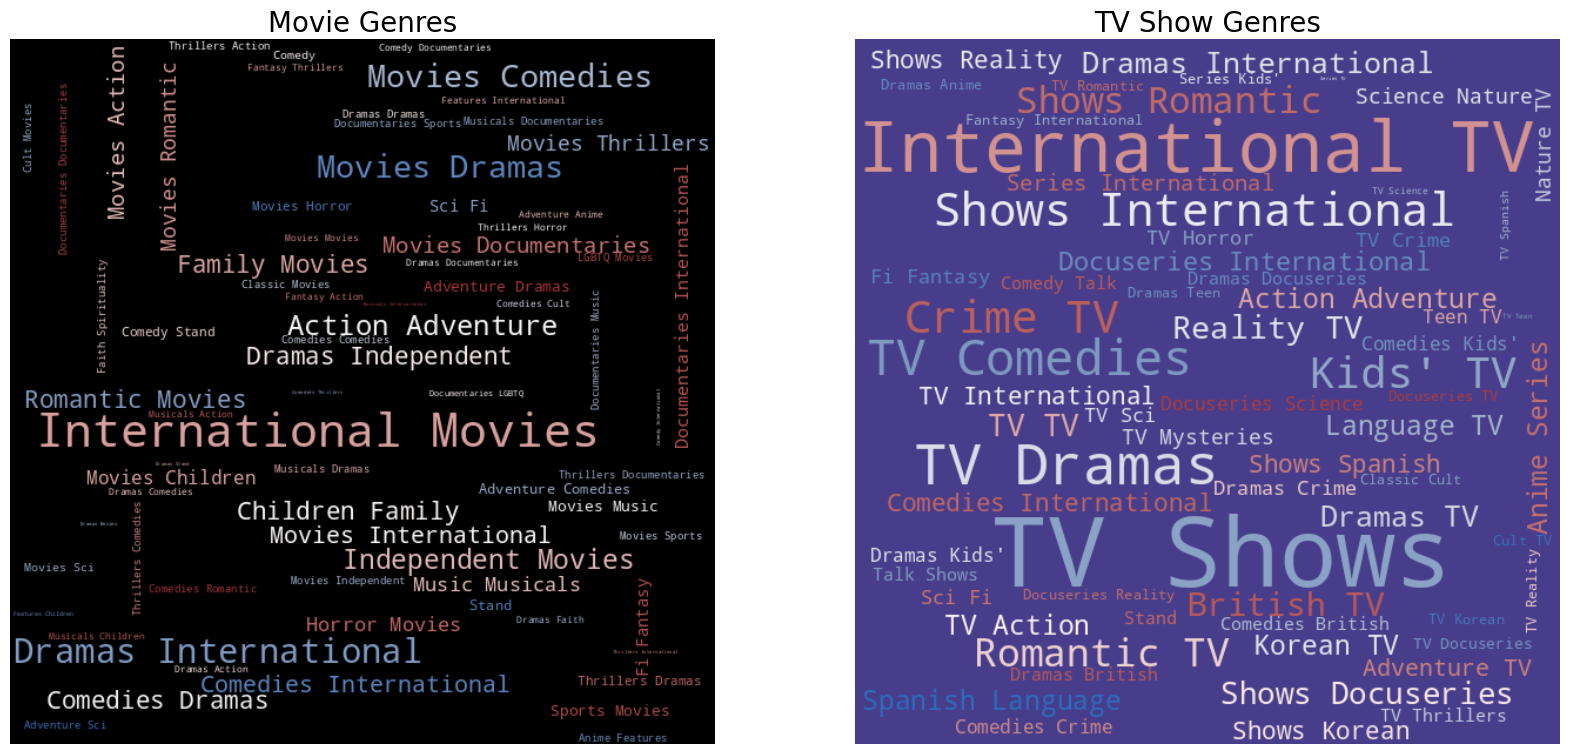

In [ ]:
# Chart - 11 visualization code

# Generate word cloud for movies
text_movies = ' '.join(df_movies['listed_in'])
wordcloud_movies = WordCloud(background_color='black', colormap='vlag', width=600, height=600, max_words=121).generate(text_movies)

# Generate word cloud for TV shows
text_tv_shows = ' '.join(df_tv_shows['listed_in'])
wordcloud_tv_shows = WordCloud(background_color='darkslateblue', colormap='vlag', width=600, height=600, max_words=121).generate(text_tv_shows)

# Plot side-by-side subplots
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_movies, interpolation='bilinear')
plt.title('Movie Genres', fontsize=20)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_tv_shows, interpolation='bilinear')
plt.title('TV Show Genres', fontsize=20)
plt.axis('off')

plt.show()


### Chart - 12

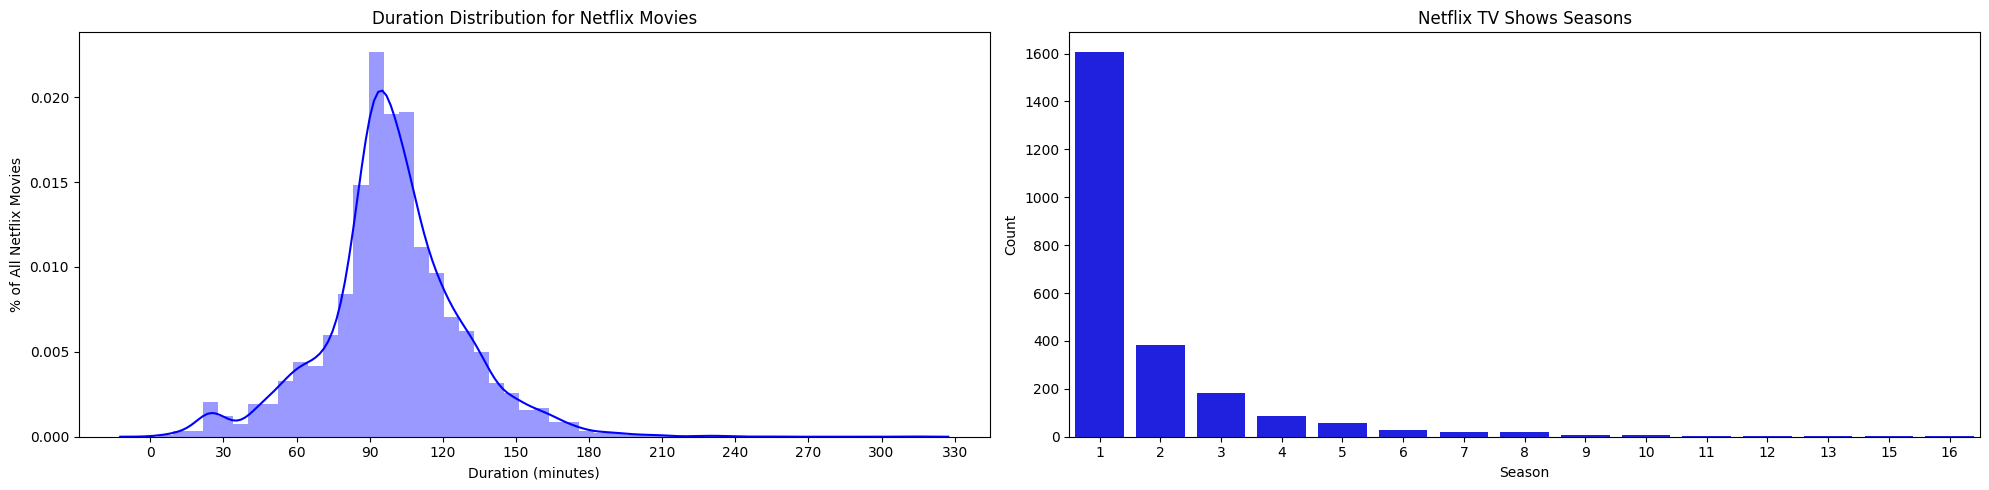

In [ ]:
# Chart - 12 visualization code

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# Plot duration distribution for Netflix movies
g1 = sns.distplot(df_movies.duration, color='blue', ax=ax[0])
g1.set_xticks(np.arange(0, 360, 30))
g1.set_title("Duration Distribution for Netflix Movies")
g1.set_ylabel("% of All Netflix Movies")
g1.set_xlabel("Duration (minutes)")

# Plot count of Netflix TV shows by seasons
g2 = sns.barplot(x=df_tv_shows['seasons'].value_counts().index, y=df_tv_shows['seasons'].value_counts(), color='blue', ax=ax[1])
g2.set_title("Netflix TV Shows Seasons")
g2.set_ylabel("Count")
g2.set_xlabel("Season")

plt.tight_layout()
plt.show()


In the left graph, we can see that the duration for netflix movies closely resembles a normal distribution with the average duration 90 minutes. Netflix TV shows seems to be heavily skewed to the right where the majority of shows only have 1 season.

### Chart - 13

([<matplotlib.patches.Wedge at 0x7d6cd9d4f820>,
 [Text(-0.8902585632950727, -0.6460957285726268, 'Others'),
  Text(0.9711911599582614, 0.7048317038974106, 'Originals')],
 [Text(-0.4855955799791305, -0.3524158519487055, '69.98%'),
  Text(0.5665281766423191, 0.4111518272734894, '30.02%')])

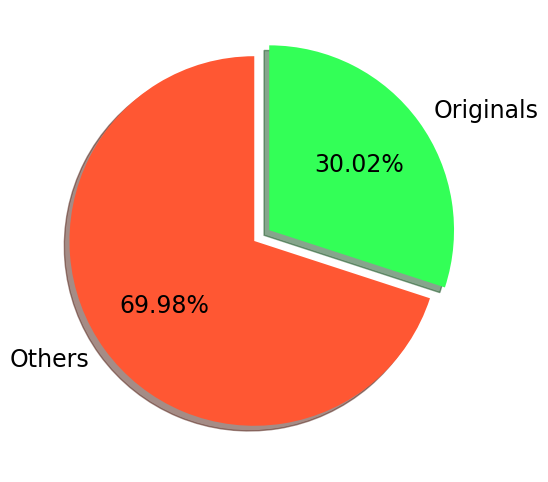

In [ ]:
# Chart - 13 visualization code

df_movies['originals'] = np.where(df_movies['release_year'] == df_movies['year_added'], 'Yes', 'No')
# Pie plot showing percentage of originals and others in movies
fig, ax = plt.subplots(figsize=(6,6))
explode = (0, 0.1)
ax.pie(df_movies['originals'].value_counts(), explode=explode, autopct='%.2f%%', labels= ['Others', 'Originals'],
       shadow=True, startangle=90,textprops={'color':"black", 'fontsize': 17}, colors =['#FF5733','#33FF57'])


### Chart - 14

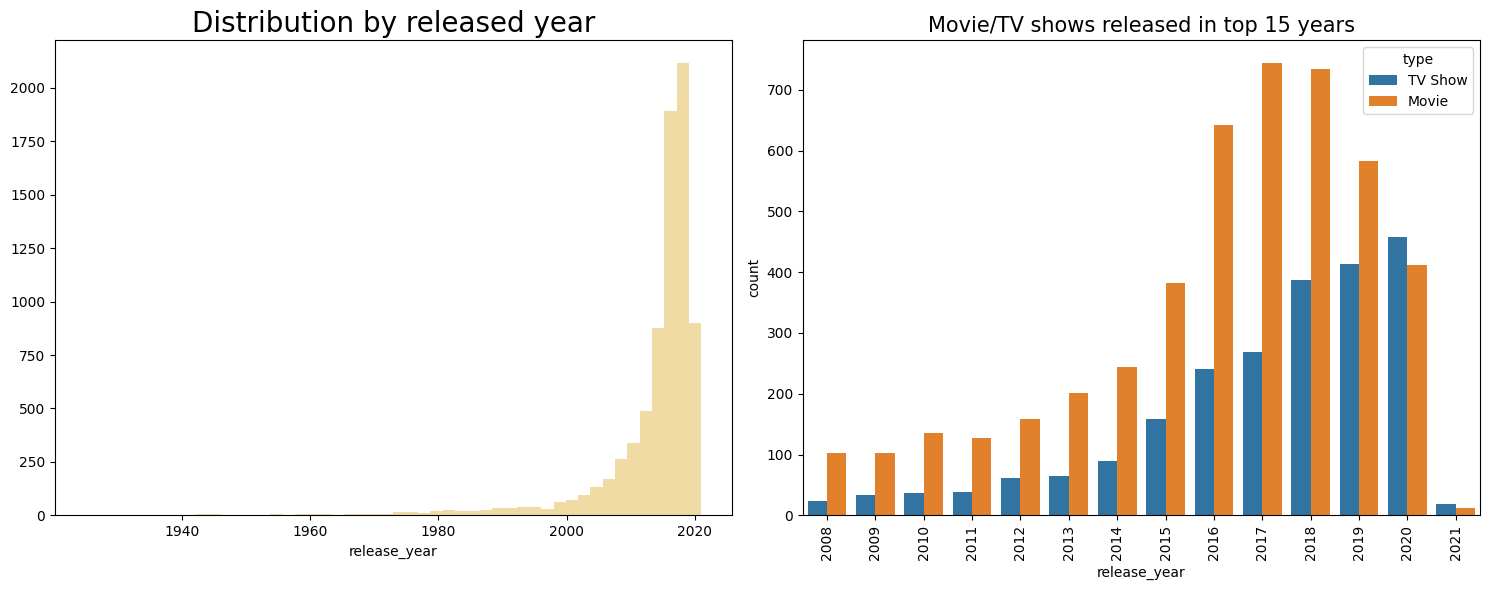

In [ ]:
# Chart - 14 visualization code

# Sort DataFrame by release_year in ascending order
df_sorted = df.sort_values('release_year')

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Univariate analysis - Distribution by released year
hist = sns.distplot(df_sorted['release_year'], ax=ax[0], kde=False, color='goldenrod')
hist.set_title('Distribution by released year', size=20)

# Bivariate analysis - Movie/TV shows released in top 15 years
count = sns.countplot(x="release_year", hue='type', data=df_sorted, order=range(2008, 2022), ax=ax[1])
count.set_title('Movie/TV shows released in top 15 years', size=15)
count.set_xticklabels(count.get_xticklabels(), rotation=90)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()


### Chart - 15

In [ ]:
# Correlation Heatmap visualization code
# Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df['target_ages'] = df['rating'].replace(ratings)

In [ ]:
# Preparing data for heatmap
df['count'] = 1
# Exclude rows with 'Unknown' in the country column
data = df[df['country'] != 'Unknown'].groupby('country')['count'].sum().sort_values(ascending=False).head(10).index.tolist()

df_heatmap = df.loc[df['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country'], df_heatmap['target_ages'], normalize="index").T
df_heatmap


country        Canada     Egypt    France     India     Japan  Mexico  \
target_ages                                                             
Adults       0.446328  0.277228  0.678261  0.255688  0.364444    0.77   
Kids         0.180791  0.000000  0.095652  0.016251  0.008889    0.02   
Older Kids   0.225989  0.039604  0.060870  0.160347  0.271111    0.07   
Teens        0.146893  0.683168  0.165217  0.567714  0.355556    0.14   

country      South Korea     Spain  United Kingdom  United States  
target_ages                                                        
Adults          0.469945  0.835821        0.513854       0.501959  
Kids            0.027322  0.022388        0.093199       0.073276  
Older Kids      0.120219  0.044776        0.204030       0.187696  
Teens           0.382514  0.097015        0.188917       0.237069

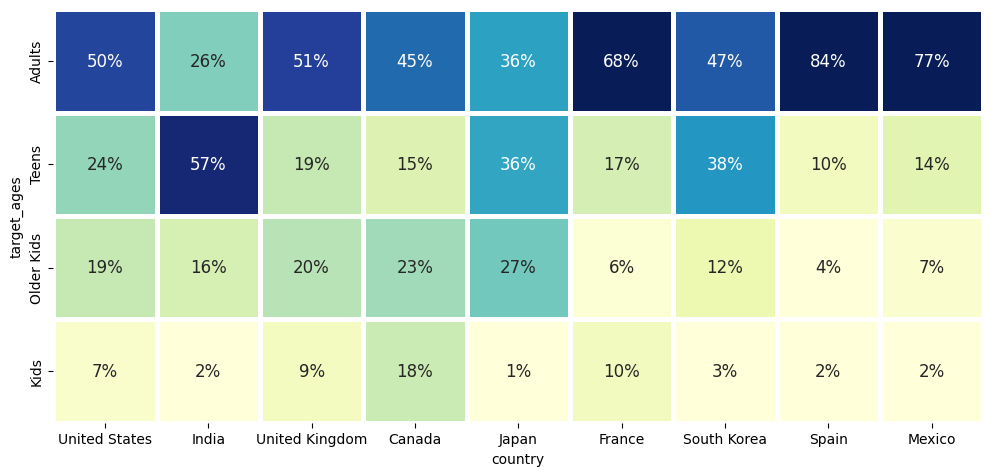

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico']
age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(data=df_heatmap.loc[age_order, country_order2],
            cmap='YlGnBu',
            square=True,
            linewidth=2.5,
            cbar=False,
            annot=True,
            fmt='1.0%',
            vmax=.6,
            vmin=0.05,
            ax=ax,
            annot_kws={"fontsize": 12})
plt.show()

### Chart - 16 Correlation Heatmap

In [ ]:
df['count'] = 1
data1 = df.groupby('listed_in')['count'].sum().sort_values(ascending=False).head(10).index.tolist()

In [ ]:
data1

['Documentaries',
 'Stand-Up Comedy',
 'Dramas, International Movies',
 'Comedies, Dramas, International Movies',
 'Dramas, Independent Movies, International Movies',
 "Kids' TV",
 'Children & Family Movies',
 'Documentaries, International Movies',
 'Children & Family Movies, Comedies',
 'Comedies, International Movies']

In [ ]:
df_heatmap1 = df.loc[df['listed_in'].isin(data1)]
df_heatmap1 = pd.crosstab(df_heatmap1['listed_in'],df_heatmap1['target_ages'],normalize = "index").T
df_heatmap1


listed_in    Children & Family Movies  Children & Family Movies, Comedies  \
target_ages                                                                 
Adults                       0.000000                            0.000000   
Kids                         0.564972                            0.177515   
Older Kids                   0.435028                            0.816568   
Teens                        0.000000                            0.005917   

listed_in    Comedies, Dramas, International Movies  \
target_ages                                           
Adults                                     0.345679   
Kids                                       0.004115   
Older Kids                                 0.123457   
Teens                                      0.526749   

listed_in    Comedies, International Movies  Documentaries  \
target_ages                                                  
Adults                             0.484472       0.386228   
Kids                               0.012422       0.059880   
Older Kids                         0.099379       0.254491   
Teens                              0.403727       0.299401   

listed_in    Documentaries, International Movies  \
target_ages                                        
Adults                                  0.377907   
Kids                                    0.063953   
Older Kids                              0.238372   
Teens                                   0.319767   

listed_in    Dramas, Independent Movies, International Movies  \
target_ages                                                     
Adults                                               0.660465   
Kids                                                 0.004651   
Older Kids                                           0.083721   
Teens                                                0.251163   

listed_in    Dramas, International Movies  Kids' TV  Stand-Up Comedy  
target_ages                                                           
Adults                           0.468750  0.000000         0.894081  
Kids                             0.006250  0.565854         0.000000  
Older Kids                       0.109375  0.434146         0.018692  
Teens                            0.415625  0.000000         0.087227

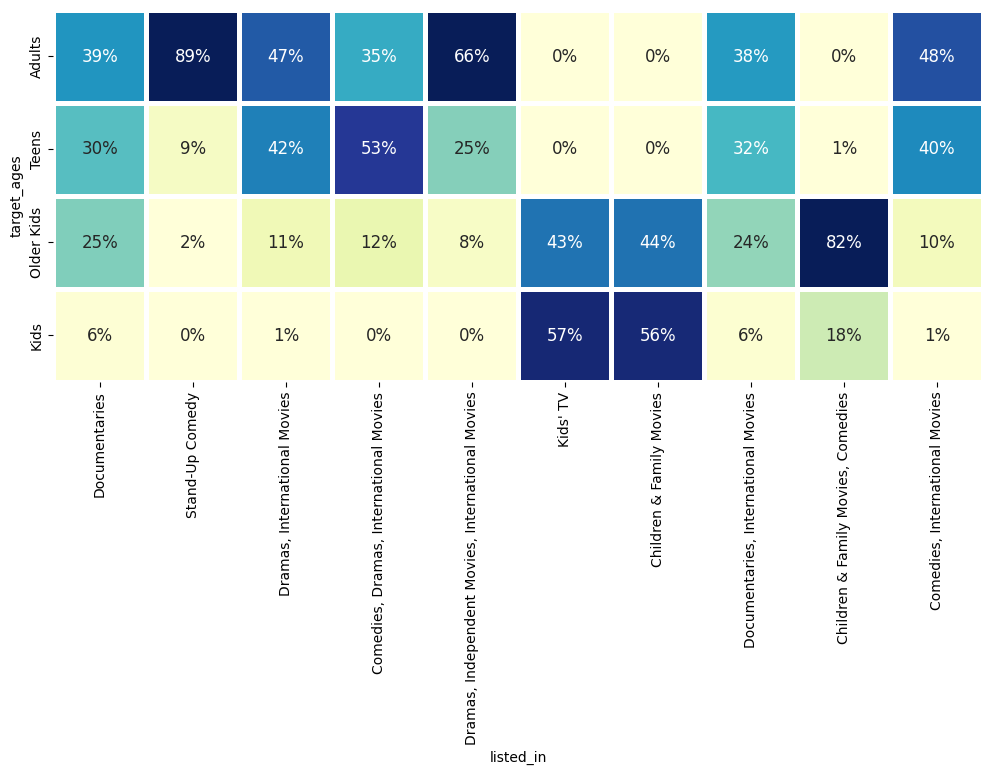

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

top=['Documentaries', 'Stand-Up Comedy', 'Dramas, International Movies',
       'Comedies, Dramas, International Movies',
       'Dramas, Independent Movies, International Movies', "Kids' TV",
       'Children & Family Movies', 'Documentaries, International Movies',
       'Children & Family Movies, Comedies',
       'Comedies, International Movies']
age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(data=df_heatmap1.loc[age_order, top],
            cmap='YlGnBu',
            square=True,
            linewidth=2.5,
            cbar=False,
            annot=True,
            fmt='1.0%',
            vmax=.6,
            vmin=0.05,
            ax=ax,
            annot_kws={"fontsize": 12})
plt.show()


## ***4. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

* #### Movies rated for kids and older kids are not at least two hours long.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

(Null hypothesis) H0: Movies rated for kids and older kids are at least two hours long.

(Alternative hypothesis) H1: Movies rated for kids and older kids are not at least two hours long.

#### 2. Perform an appropriate statistical test.

In [ ]:
#making copy of df_clean_frame
df_hypothesis = df.copy()
#head of df_hypothesis
df_hypothesis.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating   duration  \
0 2020-08-14          2020  TV-MA  4 Seasons   
1 2016-12-23          2016  TV-MA     93 min   
2 2018-12-20          2011      R     78 min   
3 2017-11-16          2009  PG-13     80 min   
4 2020-01-01          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  month_added  year_added  \
0  In a future where the elite inhabit an island ...          8.0      2020.0   
1  After a devastating earthquake hits Mexico Cit...         12.0      2016.0   
2  When an army recruit is found dead, his fellow...         12.0      2018.0   
3  In a postapocalyptic world, rag-doll robots hi...         11.0      2017.0   
4  A brilliant group of students become card-coun...          1.0      2020.0   

  target_ages  count  
0      Adults      1  
1      Adults      1  
2      Adults      1  
3       Teens      1  
4       Teens      1

In [ ]:
#filtering movie from Type_of_show column
netflix_hypothesis = df_hypothesis[df_hypothesis["type"] == "Movie"]

In [ ]:
#with respect to each ratings assigning it into group of categories
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

netflix_hypothesis['target_ages'] = netflix_hypothesis['rating'].replace(ratings_ages)
#let's see unique target ages
netflix_hypothesis['target_ages'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids', nan], dtype=object)

In [ ]:

netflix_hypothesis['target_ages'] = pd.Categorical(netflix_hypothesis['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

netflix_hypothesis['duration'] = netflix_hypothesis['duration'].astype(str)  # Convert to string type
netflix_hypothesis['duration'] = netflix_hypothesis['duration'].str.extract('(\d+)')
netflix_hypothesis['duration'] = pd.to_numeric(netflix_hypothesis['duration'])

netflix_hypothesis.head(3)

show_id   type  title           director  \
1      s2  Movie   7:19  Jorge Michel Grau   
2      s3  Movie  23:59       Gilbert Chan   
3      s4  Movie      9        Shane Acker   

                                                cast        country  \
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   

  date_added  release_year rating  duration  \
1 2016-12-23          2016  TV-MA        93   
2 2018-12-20          2011      R        78   
3 2017-11-16          2009  PG-13        80   

                                           listed_in  \
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   

                                         description  month_added  year_added  \
1  After a devastating earthquake hits Mexico Cit...         12.0      2016.0   
2  When an army recruit is found dead, his fellow...         12.0      2018.0   
3  In a postapocalyptic world, rag-doll robots hi...         11.0      2017.0   

  target_ages  count  
1      Adults      1  
2      Adults      1  
3       Teens      1

In [ ]:
# Group by duration and target_ages
group_by_ = netflix_hypothesis.groupby('target_ages')

# Calculate the mean of group_by variables
group = group_by_['duration'].mean().reset_index()
print(group)

# Get groups for 'Kids' and 'Older Kids'
A = group_by_.get_group('Kids')['duration']
B = group_by_.get_group('Older Kids')['duration']

# Calculate mean and std. calculation for kids and older kids variables
M1 = A.mean()
S1 = A.std()
M2 = B.mean()
S2 = B.std()

print('Mean duration for movies rated for Kids: {}\nMean duration for movies rated for Older Kids: {}'.format(M1, M2))
print('Standard deviation of duration for movies rated for Kids: {}\nStandard deviation of duration for movies rated for Older Kids: {}'.format(S1, S2))


  target_ages    duration
0        Kids   66.486891
1  Older Kids   92.024648
2       Teens  110.025332
3      Adults   98.275145
Mean duration for movies rated for Kids: 66.48689138576779
Mean duration for movies rated for Older Kids: 92.02464788732394
Standard deviation of duration for movies rated for Kids: 31.739464779840176
Standard deviation of duration for movies rated for Older Kids: 31.182576758429978


In [ ]:
#import stats
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue', t_val)


267 852
dof 1117
SP_2 = 999.0491470682085
SP 31.6077387212089
tvalue -11.51992627853396


In [ ]:
#t-distribution
stats.t.ppf(0.025,dof)

-1.9620900365868952

In [ ]:
#t-distribution
stats.t.ppf(0.975,dof)

1.9620900365868947

t-value is not in the range, the null hypothesis is rejected.

As a result, movies rated for kids and older kids are not at least two hours long.

### Hypothetical Statement - 2

* #### The proportion of movies with a rating of 'TV-MA' (mature audiences only) has increased in the last decade.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

(Null hypothesis) H0: The proportion of movies with a rating of 'TV-MA' has remained constant in the last decade.

(Alternative hypothesis) H1: The proportion of movies with a rating of 'TV-MA' has increased in the last decade.

#### 2. Perform an appropriate statistical test.

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

# Filter for movies released in the last decade (2011-2021)
recent_movies = df_hypothesis[(df_hypothesis['type'] == 'Movie') & (df_hypothesis['release_year'] >= 2011)]

# Calculate the proportion of movies with an 'R' rating in last decade
r_proportion = len(recent_movies[recent_movies['rating'] == 'TV-MA']) / len(recent_movies)

# Overall historical proportion of movies with an 'R' rating
overall_proportion = len(df_hypothesis[df_hypothesis['rating'] == 'TV-MA']) / len(df)

# Perform a one-sample proportion test
z_score, p_val = proportions_ztest(r_proportion * len(recent_movies), len(recent_movies), overall_proportion)

# Print the results
print("P-value:", p_val)
print()
if p_val < 0.05:
  print(f"Since p-value ({p_val}) is less than 0.05, we reject null hypothesis.")
  print("The proportion of movies with a rating of 'TV-MA' has increased in the last decade.")
else:
  print(f"Since p-value ({p_val}) is greater than 0.05, we fail to reject null hypothesis.")
  print("Hence, The proportion of movies with a rating of 'TV-MA' has remained same in the last decade.")

P-value: 3.5336533533348024e-05

Since p-value (3.5336533533348024e-05) is less than 0.05, we reject null hypothesis.
The proportion of movies with a rating of 'TV-MA' has increased in the last decade.


### Hypothetical Statement - 3

* #### There is a significant difference in the average duration of movies released in the United States compared to those released in India.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

(Null hypothesis) H0: There is no significant difference in the average duration of movies released in the United States compared to those released in India.

(Alternative hypothesis) H1: There is a significant difference in the average duration of movies released in the United States compared to those released in India.

#### 2. Perform an appropriate statistical test.

In [ ]:
from scipy.stats import ttest_1samp, ttest_ind

# Create a new dataframe with one row per country since some movies are released in multiple countries
d = df_hypothesis[df_hypothesis['type']=='Movie'].explode('country')

# Subset data for movies released in the US and India
us_movies = d[d['country'] == 'United States']['duration']
india_movies = d[d['country'] == 'India']['duration']

# Perform t-test
t_stats, p_val = ttest_ind(us_movies, india_movies, equal_var=True)

# Print the results
print("Average movie duration in India:", round(india_movies.mean(), 1), "mins")
print("Average movie duration in USA:", round(us_movies.mean(), 1), "mins")
print("P-value:", p_val)
print()
if p_val < 0.05:
  print(f"Since p-value ({p_val}) is less than 0.05, we reject null hypothesis.")
  print("There is a significant difference in the average duration of movies released in the United States compared to those released in India.")
else:
  print(f"Since p-value ({p_val}) is greater than 0.05, we fail to reject null hypothesis.")
  print("Hence, There is no significant difference in the average duration of movies released in the United States compared to those released in India.")


Average movie duration in India: 127.4 mins
Average movie duration in USA: 89.4 mins
P-value: 3.414092640756154e-234

Since p-value (3.414092640756154e-234) is less than 0.05, we reject null hypothesis.
There is a significant difference in the average duration of movies released in the United States compared to those released in India.


## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling missing values

In [ ]:
# Checking for null values
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
month_added       10
year_added        10
target_ages        7
count              0
dtype: int64

In [ ]:
# Handling missing values
df[['director','cast','country']] = df[['director','cast','country']].fillna('Unknown')
df.dropna(subset=['date_added','rating'], axis=0, inplace=True)

Since there are lots of missing values present in the 'director', 'cast' and 'country' columns, we will fill those null values with word Unknown. The other two labels 'date_added' and 'rating' contains an insignificant portion of missing data so we will drop those rows from the dataset.


In [ ]:
# Again check if we handled all the null values
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
month_added     0
year_added      0
target_ages     0
count           0
dtype: int64

Now we can see that there are no null values present in our dataset.

## 2. Handling outliers

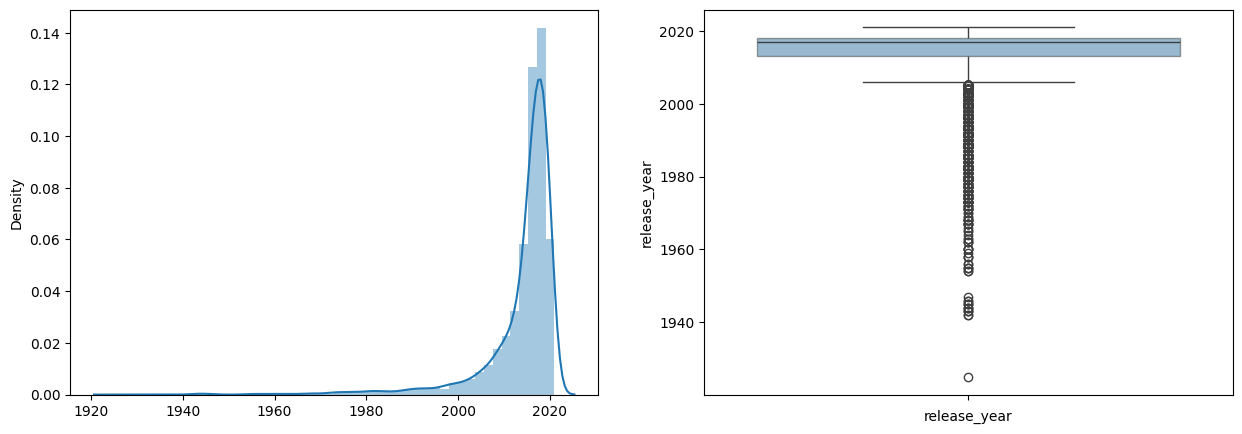

In [ ]:
import seaborn as sns

# plotting graph
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Display dist plot.
sns.distplot(x=df['release_year'], ax=ax[0])

# Display boxplot and only show outliers
sns.boxplot(data=df['release_year'], ax=ax[1], showfliers=True, boxprops=dict(alpha=0.5))

# Set the label for the boxplot
ax[1].set_xlabel('release_year')

plt.show()




**Handling Outliers**
* Except for the release year, almost all of the data are presented in text format.
* The textual format contains the data we need to build a cluster/building model. Therefore, there is no need to handle outliers.

## 3. Textual Data Preprocessing

(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [ ]:
# creating copy to preserve original textual data just in case
df2 = df.copy()

### 1. Expand Contraction

In [ ]:
!pip install contractions
import contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 12.3 MB/s eta 0:00:00


In [ ]:
# Function to apply contraction expansion to a string
def expand_contractions(text):
    return contractions.fix(text)

In [ ]:
# Apply contraction expansion to the description column
df2['description'] = df2['description'].apply(expand_contractions)

In [ ]:
# Concatenating all important text columns for text preprocessing for each row into one feature
df2['movie_data'] = df['director'] + ' ' + df['country'] + ' ' + df['rating'] + ' ' + df['cast'] + ' ' + df['listed_in'] + ' ' + df['description']

In [ ]:
# Sample combined textual data
df2['movie_data'][1]

'Jorge Michel Grau Mexico TV-MA Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato Dramas, International Movies After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive.'

### 2. Lower Casing

In [ ]:
# Lowering cases of words
df2['movie_data'] = df2['movie_data'].str.lower()

### 3. Removing non-ASCII characters:

In [ ]:
# function to remove non-ascii characters
import unicodedata

def remove_non_ascii(words):
    """Function to remove non-ASCII characters"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

In [ ]:
# remove non-ascii characters
df2['movie_data'] = remove_non_ascii(df2['movie_data'])

### 4. Removing Punctuations

In [ ]:
# Function to remove all punctuations from text
# got list of punctuations from string library
def remove_punctuations(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

In [ ]:
# Removing punctuations row by row
df2['movie_data'] = df2['movie_data'].apply(remove_punctuations)

### 5. Removing Special Characters

In [ ]:
## Function to remove special characters

# Import regex library
import re

def remove_special_char(corpus):
    """Remove Special Characters from the corpus, if present
    args:
    corpus (string): corpus to which a function is to be applied
    return:
    clean corpus without  special characters
    """
    return re.sub(r"[^a-zA-Z0-9]"," ",corpus)

# Apply the remove_special_char function to each instance in variable clean_description
df2['movie_data']=df2['movie_data'].apply(remove_special_char)

### 6. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Function to remove URLs if any as they doesnot contain any useful info about the shows, it is just an address
def remove_urls(text):
  text = re.sub(r'http\S+|www\S+', '', text)
  return text

In [ ]:
# Removing urls row by row
df2['movie_data'] = df2['movie_data'].apply(remove_urls)

### 7. Removing Stopwords & Removing White spaces

In [ ]:
# Fuction to removing stopwords
def remove_stopwords(text):
    # Getting words from text
    words = nltk.word_tokenize(text)
    # Removing english stopwords from the list of words
    words = [word for word in words if word.lower() not in stopwords.words('english')]
    # Joining the remaining words back into sentence
    text = ' '.join(words)
    return text

In [ ]:
# Function to remove extra whitespaces
def remove_whitespaces(text):
    # Replace all sequences of whitespace characters with a single space
    text = re.sub('\s+', ' ', text)
    # Remove any leading or trailing whitespace
    text = text.strip()
    return text

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Removing stopwords and extra spaces from text row by row
df2['movie_data'] = df2['movie_data'].apply(remove_stopwords)

In [ ]:
# Removing extra spaces from text row by row
df2['movie_data'] = df2['movie_data'].apply(remove_whitespaces)

In [ ]:
# Sample processed data
df2['movie_data'][1]

'jorge michel grau mexico tvma demian bichir hector bonilla oscar serrano azalia ortiz octavio michel carmen beato dramas international movies devastating earthquake hits mexico city trapped survivors walks life wait rescued trying desperately stay alive'

### 8. Text Normalization

In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
# Applying lemmatization to bring words ito their base forms
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize each word in a sentence
def lemmatize_sentence(sentence):
    token_words = nltk.word_tokenize(sentence)
    lem_sentence = [lemmatizer.lemmatize(word, pos='v') for word in token_words]
    lem_sentence = ' '.join(lem_sentence)
    return lem_sentence

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Applying lemmatization on movie_data column
df2['movie_data'] = df2['movie_data'].apply(lemmatize_sentence)

In [ ]:
# Sample data after lemmatization
df2['movie_data'][1]

'jorge michel grau mexico tvma demian bichir hector bonilla oscar serrano azalia ortiz octavio michel carmen beato dramas international movies devastate earthquake hit mexico city trap survivors walk life wait rescue try desperately stay alive'

Which text normalization technique have you used and why?

I used Lemmatization to normaliza data, because in general, lemmatization is a more accurate method than stemming, also the dataset is not too big (just 7.7k rows) so speed is not a concern hence, for better accuracy lemmatization is recommended.

### 9. Tokenization

In [ ]:
from nltk.tokenize import TweetTokenizer

In [ ]:
# Creating TweetTokenizer instance for getting tokens (words) from sentences
tokenizer = TweetTokenizer()

In [ ]:
# Applying tokenization
df2['movie_data'] = df2['movie_data'].apply(lambda x: tokenizer.tokenize(x))

In [ ]:
# sample movie_data after tokenization
print(df2['movie_data'][1])

['jorge', 'michel', 'grau', 'mexico', 'tvma', 'demian', 'bichir', 'hector', 'bonilla', 'oscar', 'serrano', 'azalia', 'ortiz', 'octavio', 'michel', 'carmen', 'beato', 'dramas', 'international', 'movies', 'devastate', 'earthquake', 'hit', 'mexico', 'city', 'trap', 'survivors', 'walk', 'life', 'wait', 'rescue', 'try', 'desperately', 'stay', 'alive']


### 10. Text Vectorization

In [ ]:
df3 = df2.copy()

In [ ]:
# data is already tokenized using TweetTokenizer hence creating identity_tokenizer which doesnot changes anything
def identity_tokenizer(text):
    return text

# Creating TfidfVectorizer instance
tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False, max_features = 10000)

# fitting and transforming processed text data using tfidf vectorizer
X = tfidf.fit_transform(df2['movie_data']).toarray()

In [ ]:
# shape of data after text vectorization
X.shape

(7770, 10000)

Which text vectorization technique have you used and why?

I used TF-IDF vectorization beacause not only gives importance to number of occurances of a word but also to rareity of that word.

### 11. Dimesionality Reduction

Do you think that dimensionality reduction is needed? Explain Why?

Yes dimentionality reduction is needed because the data has become wide data, with 7.7k rows and 7.7k columns. Hence to tackle curse of dimentionality problem we need dimentionality reduction.

In [ ]:
from sklearn.decomposition import TruncatedSVD

In [ ]:
# create TruncatedSVD object
svd = TruncatedSVD(n_components=X.shape[1]-1)

In [ ]:
# fit and transform the data
X_svd = svd.fit_transform(X)

In [ ]:
X_svd.shape

(7770, 7770)

Text(0, 0.5, 'Explained Variance Ratio')

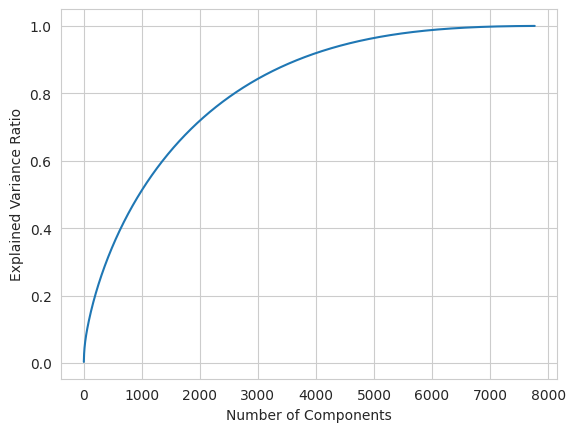

In [ ]:
# plot explained variance ratio
sns.set_style("whitegrid")
plt.plot(range(1, 7771), np.cumsum(svd.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')

More than 80% of variance is explained by 3000 components. Hence I'll go for n_components=3000.

In [ ]:
# create TruncatedSVD object with n_components=n
svd = TruncatedSVD(n_components=3000)

In [ ]:
# fit and transform the data
X_svd_3k = svd.fit_transform(X)

Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I used TruncatedSVD for dimentionality reduction. It is generally preferred for sparse data because it is specifically designed for this type of data and is more efficient than PCA

## ***7. ML Model Implementation***

### ML Model - 1 - K-Means Clustering

In [131]:
# Using Elbow method and Silhouette Method to find the optimal value of K
SSE = []
silhouette_scores = []
cluster_values = range(2,25)
# training K-Means algo for different values of K
for k in cluster_values:
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=45)
  kmeans.fit(X_svd_3k)
  SSE.append(kmeans.inertia_)
  cluster_labels = kmeans.labels_
  silhouette_scores.append(silhouette_score(X_svd, cluster_labels))

Optimal number of clusters (SSE): 16
Optimal number of clusters (Silhouette score): 24


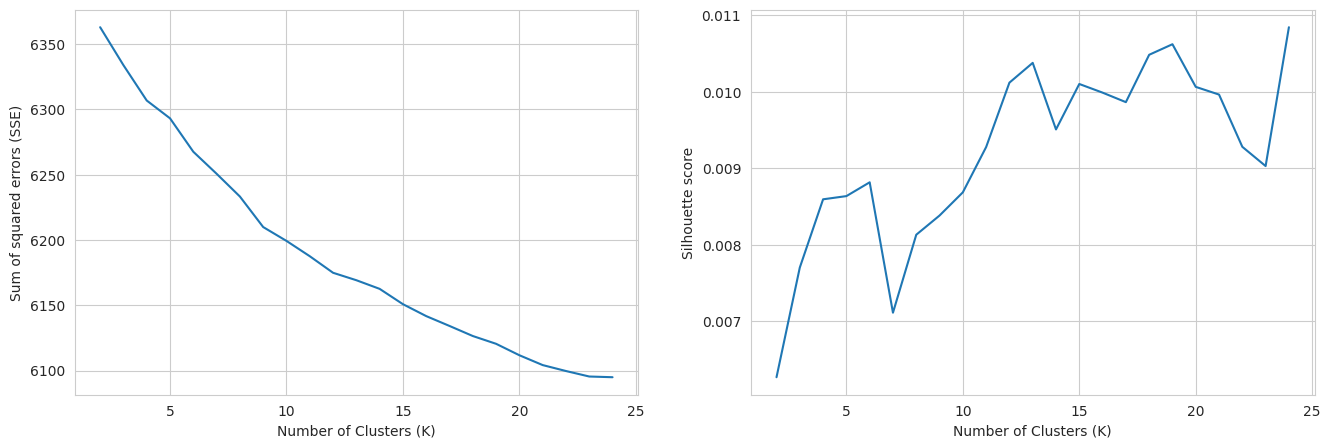

In [133]:
# Your code for plotting SSE and silhouette scores
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.plot(cluster_values, SSE)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of squared errors (SSE)')

plt.subplot(1,2,2)
plt.plot(cluster_values, silhouette_scores)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette score')

# Identify the elbow point for SSE
elbow_point_sse = None
min_diff_sse = float('inf')

for i in range(1, len(SSE)-1):
    diff1_sse = SSE[i] - SSE[i-1]
    diff2_sse = SSE[i+1] - SSE[i]
    if abs(diff2_sse - diff1_sse) < min_diff_sse:
        min_diff_sse = abs(diff2_sse - diff1_sse)
        elbow_point_sse = i+1

# Identify the optimal number of clusters using Silhouette method
optimal_clusters_silhouette = cluster_values[silhouette_scores.index(max(silhouette_scores))]

# Print the optimal number of clusters
print("Optimal number of clusters (SSE):", elbow_point_sse)
print("Optimal number of clusters (Silhouette score):", optimal_clusters_silhouette)

plt.show()


Optimal number of clusters through SSE is 16

In [134]:
# Clustering the data into 16 clusters
kmeans = KMeans(n_clusters=16, init='k-means++', random_state=45)
kmeans.fit(X_svd_3k)
# Adding a kmeans cluster number to dataframe
df2['kmeans_cluster'] = kmeans.labels_

In [136]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [137]:
# Evaluation metrics for the model
#Silhouette  Coefficient ranges from -1 to 1
print("Silhouette Coefficient:", silhouette_score(X_svd_3k, kmeans.labels_, metric='euclidean'))

# Calinski-Harabasz Index
print("Calinski-Harabasz Index:", calinski_harabasz_score(X_svd_3k, kmeans.labels_))

Silhouette Coefficient: 0.012172867747043518
Calinski-Harabasz Index: 23.7917699358814


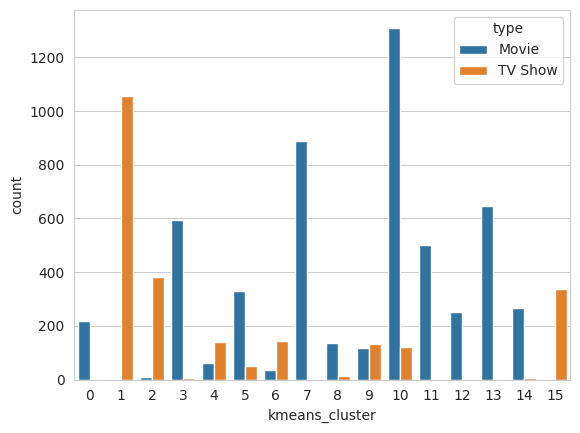

In [138]:
# visualizing number of movies and TV Shows for different clusters
sns.countplot(x='kmeans_cluster', data=df2, hue='type')

In [139]:

# Trying to find common (similar) words in different clusters using wordcloud
# Function to display word cloud
def plot_wordcloud(cluster_label):
  words_data = ''

  for val in df2[df2['kmeans_cluster']==cluster_label]['movie_data']:
    words_data += " ".join(val) + " "

  wordcloud = WordCloud(width = 700, height = 700, min_font_size = 10).generate(words_data)

  # plot the WordCloud image
  plt.imshow(wordcloud)
  plt.axis("off")

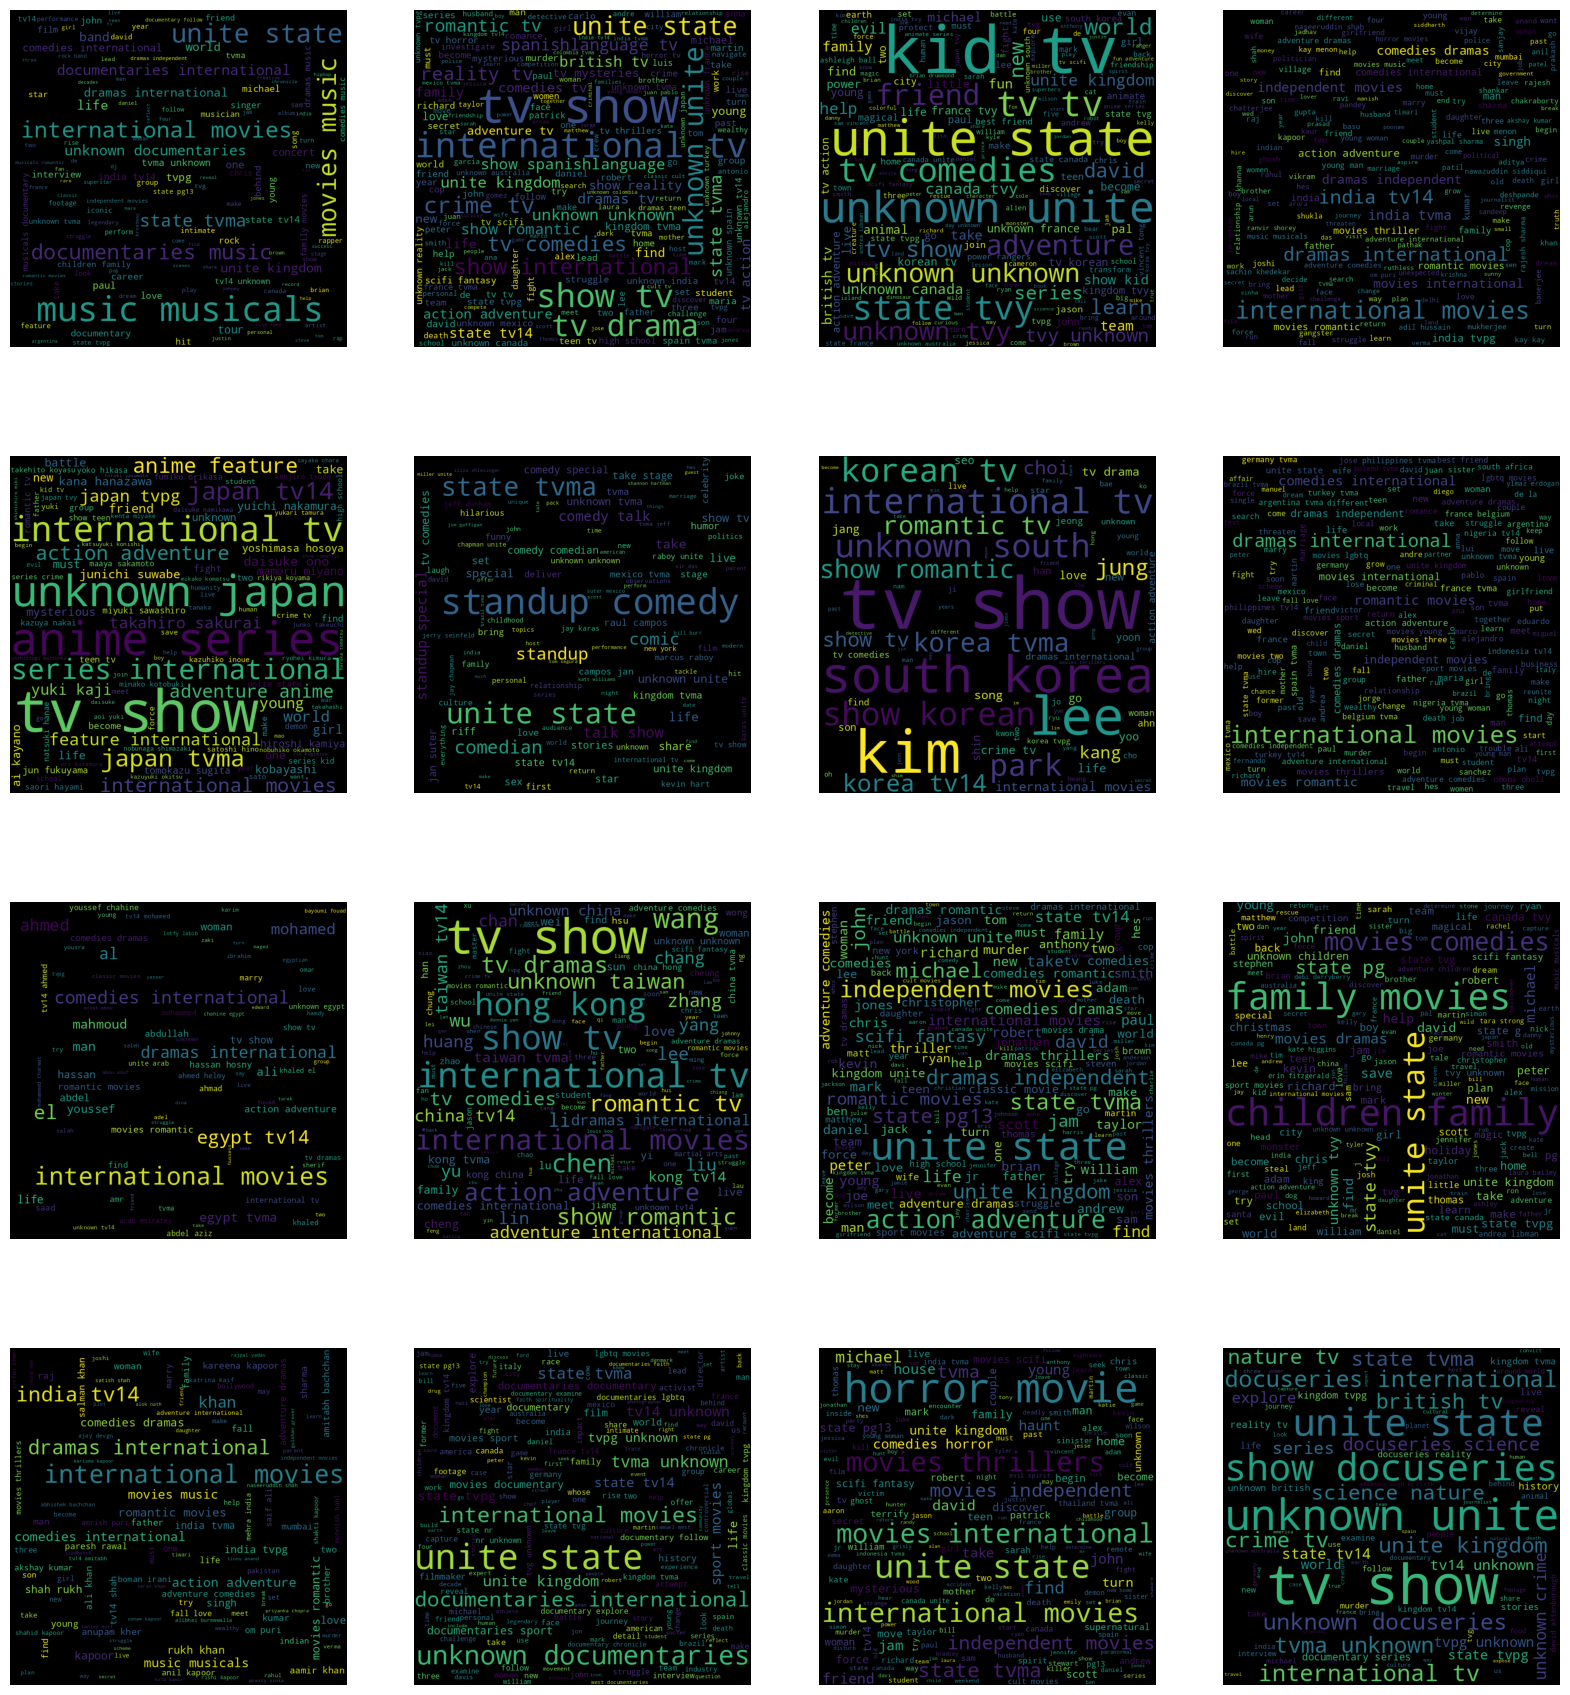

In [140]:
# Plotting top words for each clusters
plt.figure(figsize=(20, 28))
for i in range(16):
  plt.subplot(5,4,i+1)
  plot_wordcloud(i)

### ML Model - 2 - Hierarchical Clustering

Text(0, 0.5, 'Distance')

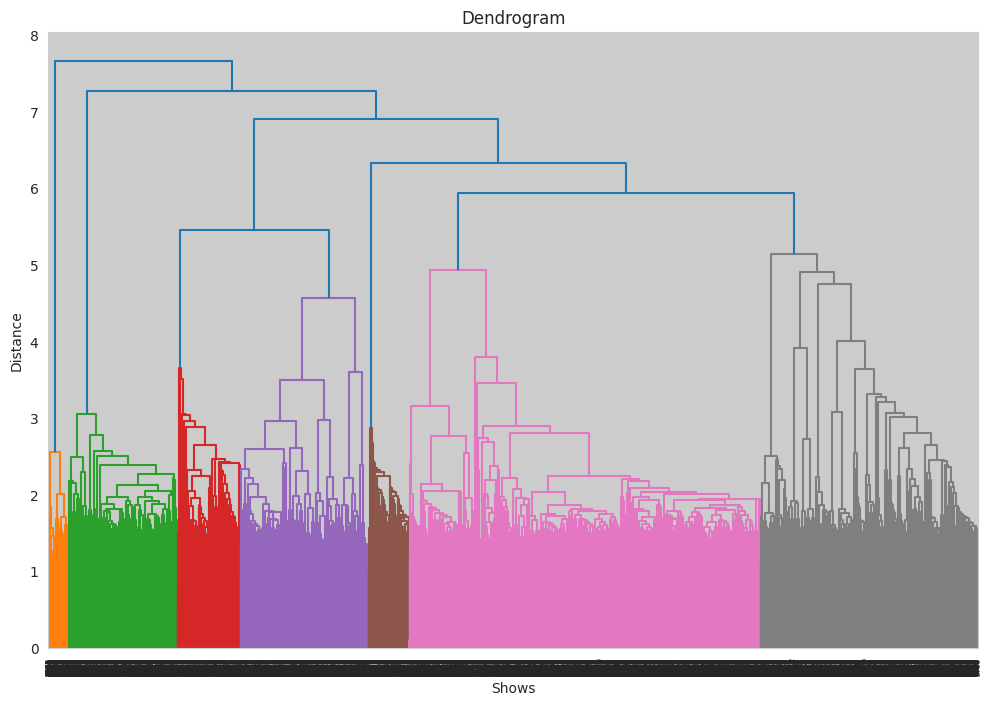

In [141]:
# Building a dendogram to decide on the number of clusters
plt.figure(figsize=(12, 8))
dend = shc.dendrogram(shc.linkage(X_svd_3k, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Shows')
plt.ylabel('Distance')

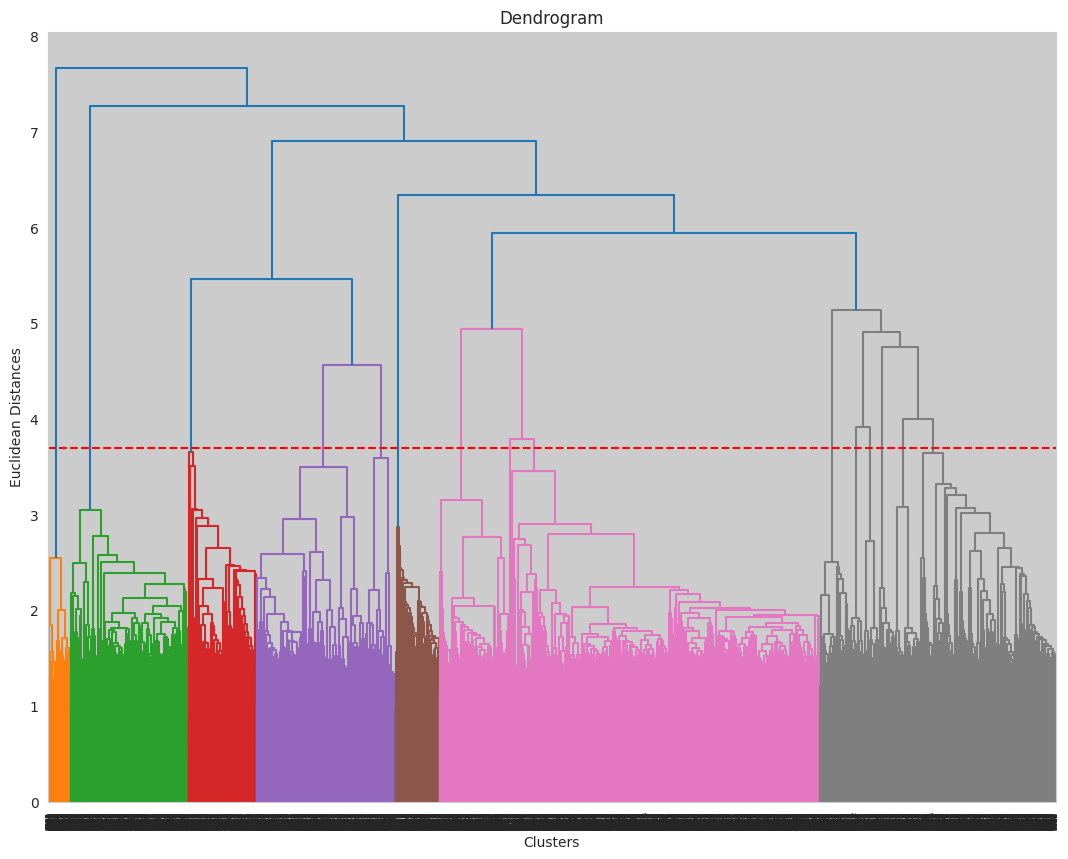

In [143]:
## Using the dendogram to find the optimal number of clusters

# Import necessary libraries
import scipy.cluster.hierarchy as sch

# Plotting dendogram
plt.figure(figsize=(13,10))
dendrogram = sch.dendrogram(sch.linkage(X_svd_3k, method = 'ward'))
plt.axhline(y=3.7, color='r', linestyle='--')
plt.title('Dendrogram')
plt.xlabel('Clusters')
plt.ylabel('Euclidean Distances')
plt.show()

At around distance 3.7, 14 clusters can be build using the agglomerative clustering algorithm.

In [144]:
# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=14, affinity='euclidean', linkage='ward')
hierarchical.fit(X_svd_3k)

AgglomerativeClustering(affinity='euclidean', n_clusters=14)

In [145]:
# Adding a hierarchical cluster numbers to dataframe
df2['hierarchical_cluster'] = hierarchical.labels_

In [146]:
# Evaluation metrics for the model
#Silhouette  Coefficient ranges from -1 to 1
print("Silhouette Coefficient:", silhouette_score(X_svd_3k, hierarchical.labels_, metric='euclidean'))

# Calinski-Harabasz Index
print("Calinski-Harabasz Index:", calinski_harabasz_score(X_svd_3k, hierarchical.labels_))

Silhouette Coefficient: 0.006461117707945221
Calinski-Harabasz Index: 19.875673394916394


<Axes: xlabel='hierarchical_cluster', ylabel='count'>

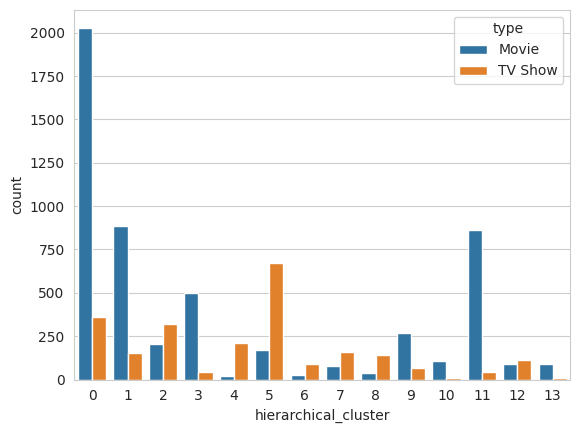

In [147]:
# visualizing number of movies and TV Shows for different clusters
sns.countplot(x='hierarchical_cluster', data=df2, hue='type')

In [148]:
# Trying to find common words in different clusters using wordcloud
# Function to display word cloud
def plot_wordcloud_hierarchical(cluster_label):
  words_data = ''

  for val in df2[df2['hierarchical_cluster']==cluster_label]['movie_data']:
    words_data += " ".join(val) + " "

  wordcloud = WordCloud(width = 700, height = 700, min_font_size = 10).generate(words_data)

  # plot the WordCloud image
  plt.imshow(wordcloud)
  plt.axis("off")

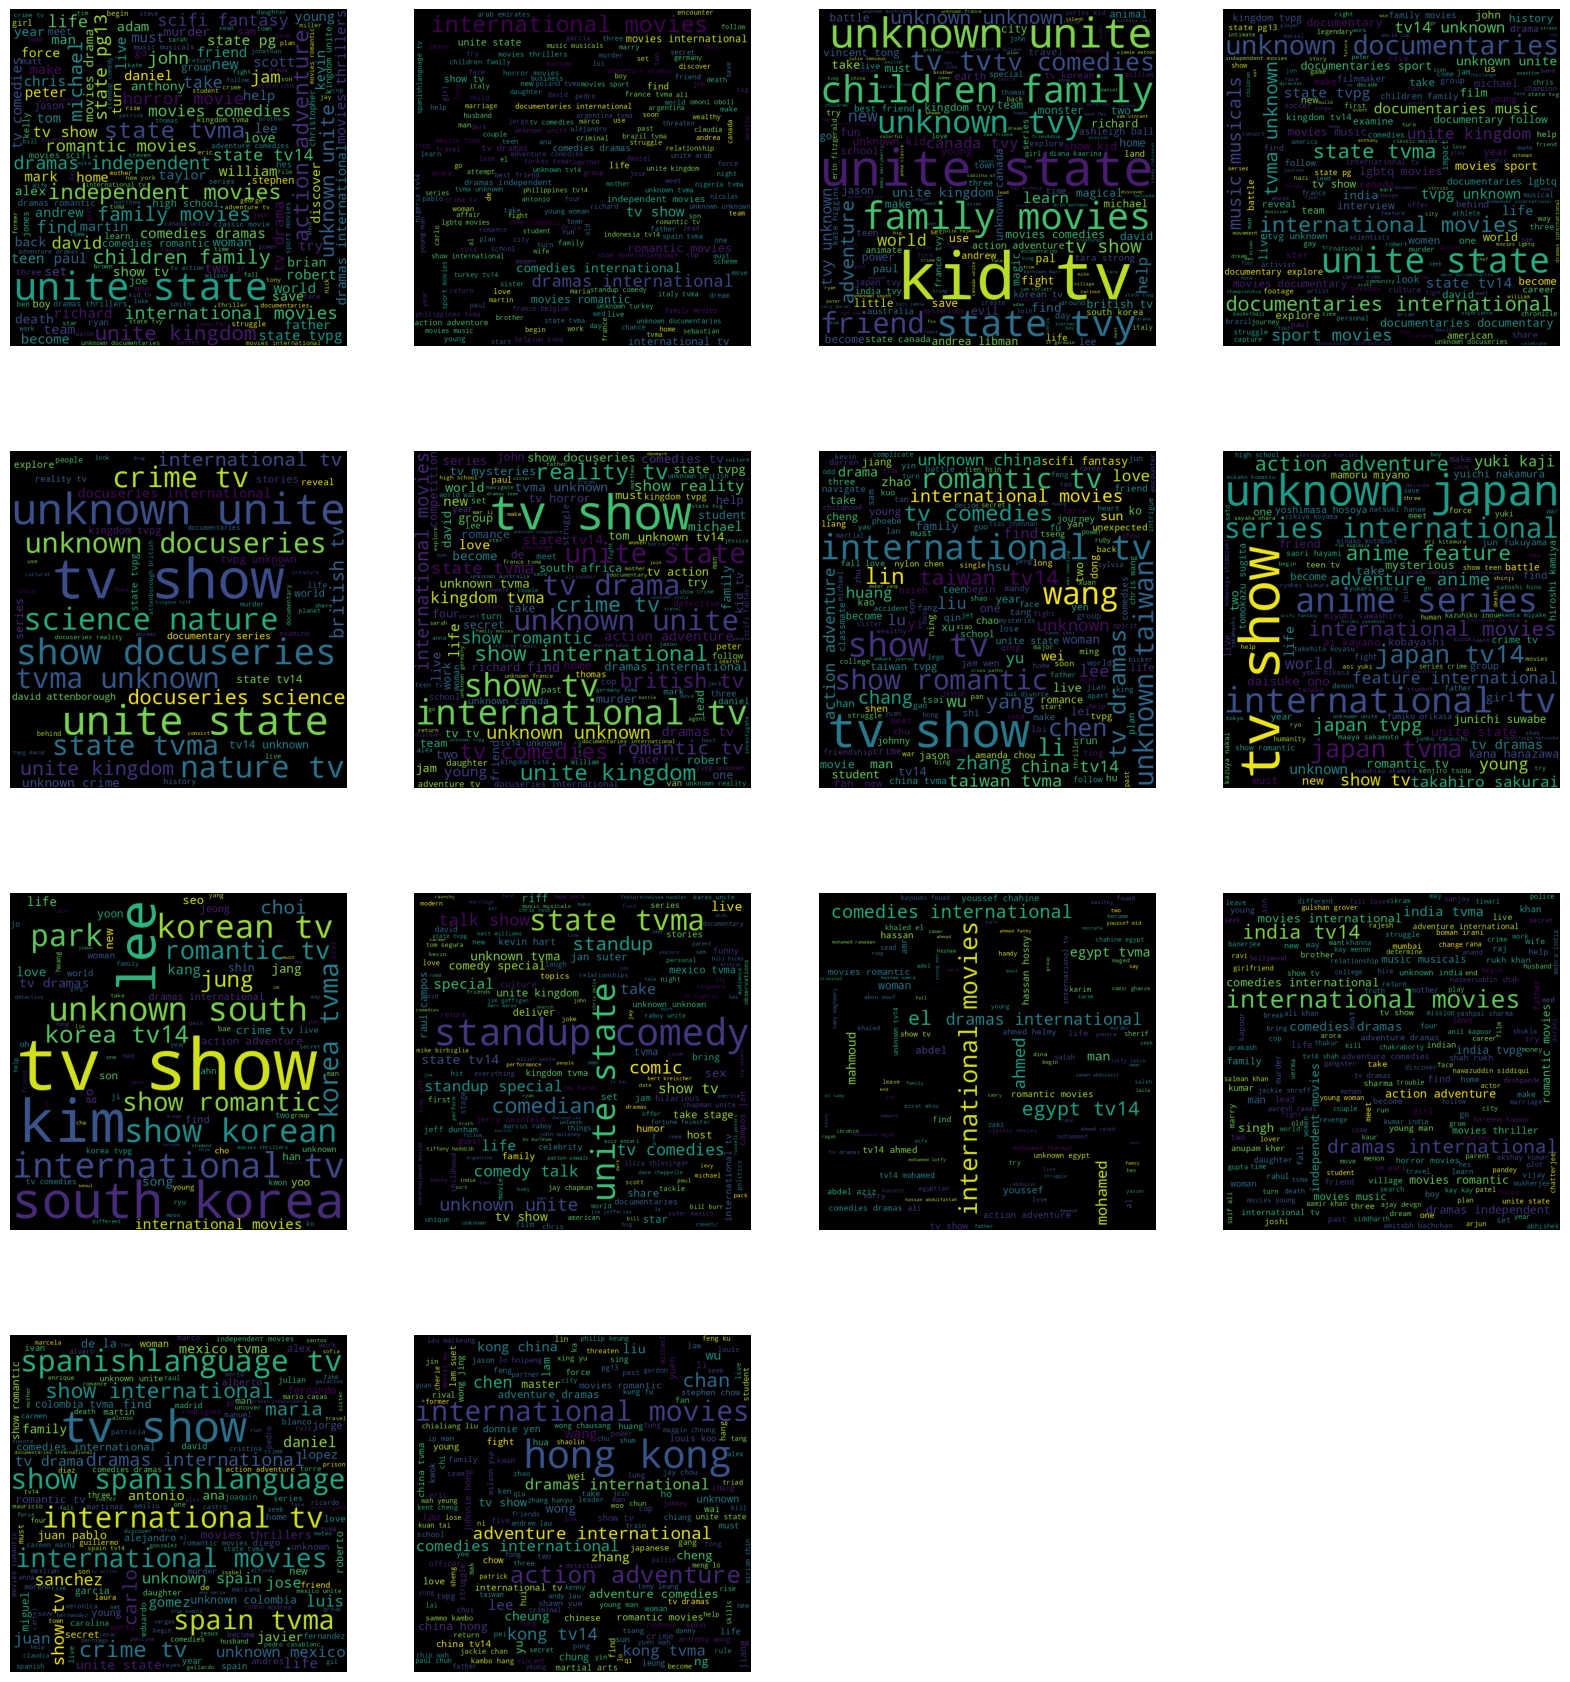

In [149]:
# Plotting top words for each clusters
plt.figure(figsize=(20, 22))
for i in range(14):
  plt.subplot(4,4,i+1)
  plot_wordcloud_hierarchical(i)

## Comparing Models based on the Evaluation Metrics

In [151]:
# Create a DataFrame
df_eval = {
    "model": ["K-Means Clustering", "Hierarchical Clustering"],
    "silhouette_score": [0.012172867747043518, 0.006461117707945221],
    "calinski_harabasz_score": [23.7917699358814, 19.875673394916394],
}

df_model = pd.DataFrame(df_eval)

# Print the DataFrame
df_model


model  silhouette_score  calinski_harabasz_score
0       K-Means Clustering          0.012173                23.791770
1  Hierarchical Clustering          0.006461                19.875673

The K-Means Clustering model has the highest silhouette score and Calinski-Harabasz score as compared to hierarchical clustering.

# **Using Content based recommender system**

In [152]:
# Changing the index of the df from show id to show title
df2['show_id'] = df2.index

In [153]:
# converting tokens to string
def convert(lst):
  return ' '.join(lst)

df2['movie_data'] = df2['movie_data'].apply(lambda x: convert(x))

In [154]:
# setting title of movies/Tv shows as index
df2.set_index('title',inplace=True)

In [155]:
# Count vectorizer
CV = CountVectorizer()
converted_matrix = CV.fit_transform(df2['movie_data'])

In [156]:
# Cosine similarity
cosine_similarity = cosine_similarity(converted_matrix)

In [157]:
# Dataset Rows & Columns count
cosine_similarity.shape

(7770, 7770)

In [158]:
# Developing a function to get 10 recommendations for a show
indices = pd.Series(df2.index)

def recommendation_df(title, cosine_sim = cosine_similarity):
  try:
    recommend_content = []
    idx = indices[indices == title].index[0]
    series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top10 = list(series.iloc[1:11].index)
    # list with the titles of the best 10 matching movies
    for i in top10:
      recommend_content.append(list(df2.index)[i])
    print("If you liked '"+title+"', you may also enjoy:\n")
    return recommend_content

  except:
    return 'Invalid Entry'

In [159]:
# Recommendations for 'A Man Called God'
recommendation_df('A Man Called God')

If you liked 'A Man Called God', you may also enjoy:



['One Spring Night',
 'Busted!',
 'The King: Eternal Monarch',
 'The Lies Within',
 'Mr. Sunshine',
 'Rugal',
 'My Mister',
 'My Secret Romance',
 'My Little Baby',
 'Love for Ten: Generation of Youth']

In [161]:
recommendation_df('14 Cameras')

If you liked '14 Cameras', you may also enjoy:



['13 Cameras',
 'I Am the Pretty Thing That Lives in the House',
 'Creep 2',
 'Norm of the North: Family Vacation',
 'Creep',
 'Haunters: The Art of the Scare',
 "He's Out There",
 'Girl on the Third Floor',
 'Ragini MMS',
 'Stephanie']

In [162]:
recommendation_df('Hum Aapke Hain Koun')

If you liked 'Hum Aapke Hain Koun', you may also enjoy:



['Maine Pyar Kiya',
 'Together For Eternity',
 'Judwaa',
 "Jaan-E-Mann: Let's Fall in Love... Again",
 'Hum Saath-Saath Hain',
 'Vivah',
 'Mann',
 'Dil',
 'Kuch Kuch Hota Hai',
 'Chaahat']

# **Conclusion**

This project is about text clustering problem in which I had to group Netflix shows into different clusters in such a way that shows in the same cluster are similar to one another and shows in different clusters are different.

* There is about 30.8% TV shows and 69.1% Movies in the dataset.
* Recently, more Movies are getting released compared to TV Shows.
* USA has the highest number of both types of shows.
* TV-MA rated movies are most popular.
* TOP 3 content genres are International movies , dramas , comedies.
* Anupan Kher acted in most number of shows.
* Most movies have duration around 90 minutes.
* Most TV Shows have duration 1 Season.
* More shows gets released during winter months.
* For text processing steps includes:
   * Expand Contraction
   * Lower Caseing
   * Removing punctuations, Stopwords, URLs, white spaces etc.
   * Lemmatzation
   * Tokenization
   * TF-IDF vectorization
   * Dimentionality Reduction (to 3000 components)
* Trained two clustering models:
KMeans Clustering (18 clusters) with silhoutte score 0.012
Hierarchical Clustering (14 clusters) with silhoutte score 0.006